# BACK ORDER PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"Train.csv")
pd.set_option('display.max_columns', None)
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0,NaN,0,0,0,0,0,0,0,0,0,No,0,-99.00,-99.00,0,No,No,No,Yes,No,No
1,1043384,2,9.0,0,0,0,0,0,0,0,0,0,No,0,0.99,0.99,0,No,No,No,Yes,No,No
2,1043696,2,NaN,0,0,0,0,0,0,0,0,0,No,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No
3,1043852,7,8.0,0,0,0,0,0,0,0,0,1,No,0,0.10,0.13,0,No,No,No,Yes,No,No
4,1044048,8,NaN,0,0,0,0,0,0,0,4,2,No,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No


In [3]:
df3=df.copy()
df3

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0,NaN,0,0,0,0,0,0,0,0,0,No,0,-99.00,-99.00,0,No,No,No,Yes,No,No
1,1043384,2,9.0,0,0,0,0,0,0,0,0,0,No,0,0.99,0.99,0,No,No,No,Yes,No,No
2,1043696,2,NaN,0,0,0,0,0,0,0,0,0,No,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No
3,1043852,7,8.0,0,0,0,0,0,0,0,0,1,No,0,0.10,0.13,0,No,No,No,Yes,No,No
4,1044048,8,NaN,0,0,0,0,0,0,0,4,2,No,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1407727,0,2.0,0,2,2,2,0,0,0,0,0,No,0,0.63,0.72,0,Yes,No,No,Yes,No,No
1048571,1407728,359,2.0,176,224,504,840,116,195,200,200,162,No,0,0.92,0.84,0,Yes,No,No,Yes,No,No
1048572,1407730,0,NaN,0,0,0,0,0,0,0,0,0,No,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1048573,1407731,0,2.0,0,12,12,12,0,0,0,0,0,No,0,0.24,0.28,0,No,No,No,No,No,No


In [4]:
train_data = df3
train_data

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0,NaN,0,0,0,0,0,0,0,0,0,No,0,-99.00,-99.00,0,No,No,No,Yes,No,No
1,1043384,2,9.0,0,0,0,0,0,0,0,0,0,No,0,0.99,0.99,0,No,No,No,Yes,No,No
2,1043696,2,NaN,0,0,0,0,0,0,0,0,0,No,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No
3,1043852,7,8.0,0,0,0,0,0,0,0,0,1,No,0,0.10,0.13,0,No,No,No,Yes,No,No
4,1044048,8,NaN,0,0,0,0,0,0,0,4,2,No,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1407727,0,2.0,0,2,2,2,0,0,0,0,0,No,0,0.63,0.72,0,Yes,No,No,Yes,No,No
1048571,1407728,359,2.0,176,224,504,840,116,195,200,200,162,No,0,0.92,0.84,0,Yes,No,No,Yes,No,No
1048572,1407730,0,NaN,0,0,0,0,0,0,0,0,0,No,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1048573,1407731,0,2.0,0,12,12,12,0,0,0,0,0,No,0,0.24,0.28,0,No,No,No,No,No,No


In [5]:
#Dropping last row as it of no use
#train_data.drop(index=train_data.index[-1],axis=0,inplace=True)
#train_data

In [6]:
train_data.isnull().sum()

sku                      0
national_inv             0
lead_time            64518
in_transit_qty           0
forecast_3_month         0
forecast_6_month         0
forecast_9_month         0
sales_1_month            0
sales_3_month            0
sales_6_month            0
sales_9_month            0
min_bank                 0
potential_issue          0
pieces_past_due          0
perf_6_month_avg         0
perf_12_month_avg        0
local_bo_qty             0
deck_risk                0
oe_constraint            0
ppap_risk                0
stop_auto_buy            0
rev_stop                 0
went_on_backorder        0
dtype: int64

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1048575 non-null  int64  
 1   national_inv       1048575 non-null  int64  
 2   lead_time          984057 non-null   float64
 3   in_transit_qty     1048575 non-null  int64  
 4   forecast_3_month   1048575 non-null  int64  
 5   forecast_6_month   1048575 non-null  int64  
 6   forecast_9_month   1048575 non-null  int64  
 7   sales_1_month      1048575 non-null  int64  
 8   sales_3_month      1048575 non-null  int64  
 9   sales_6_month      1048575 non-null  int64  
 10  sales_9_month      1048575 non-null  int64  
 11  min_bank           1048575 non-null  int64  
 12  potential_issue    1048575 non-null  object 
 13  pieces_past_due    1048575 non-null  int64  
 14  perf_6_month_avg   1048575 non-null  float64
 15  perf_12_month_avg  1048575 non-n

In [8]:
#checking missing values percentage
features_with_na=[features for features in train_data.columns if train_data[features].isnull().sum()>1]


for feature in features_with_na:
    print(feature, np.round(train_data[feature].isnull().mean(), 4),  ' % missing values')

lead_time 0.0615  % missing values


In [9]:
#checking numerical features length
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  16


In [10]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(train_data[feature].unique())<25 and feature not in year_feature+['sku']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [11]:
#continous_features
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['sku']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 15


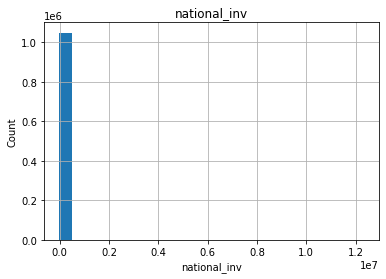

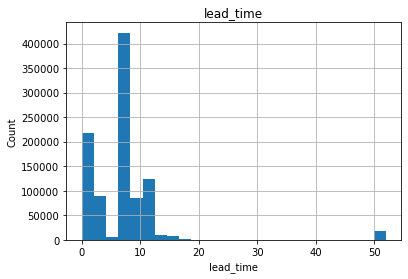

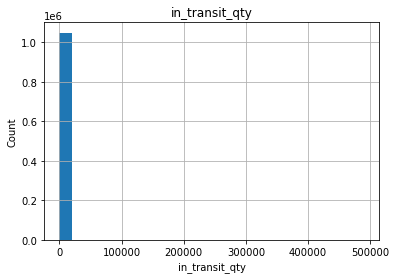

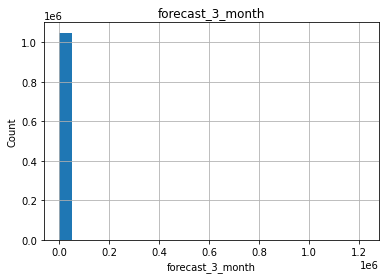

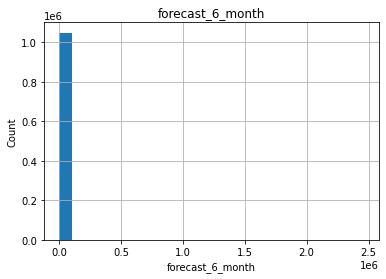

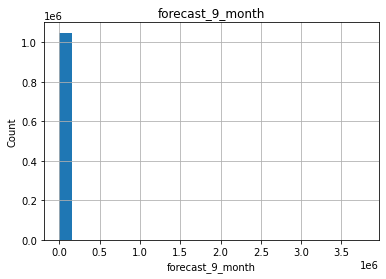

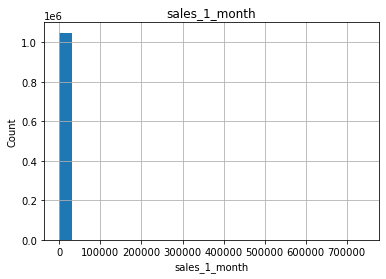

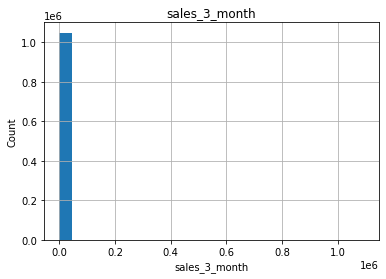

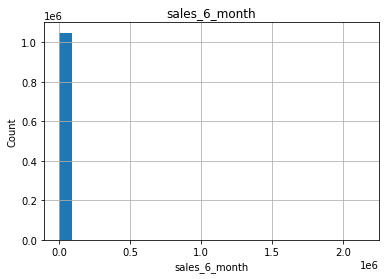

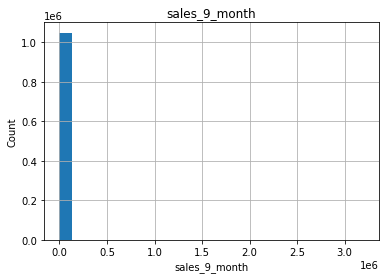

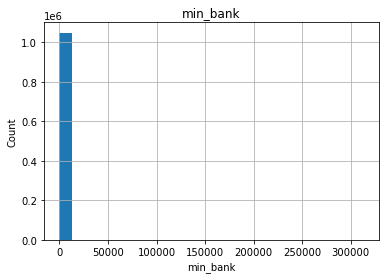

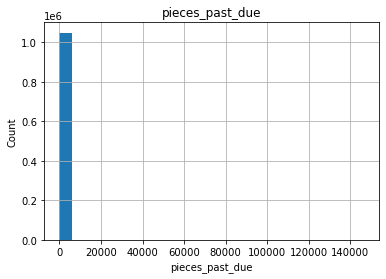

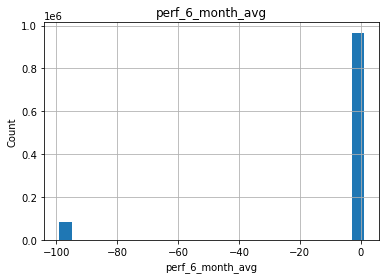

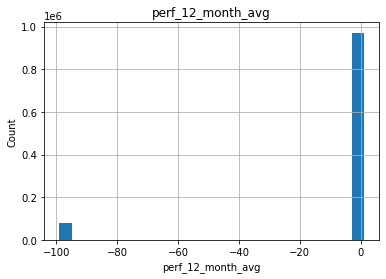

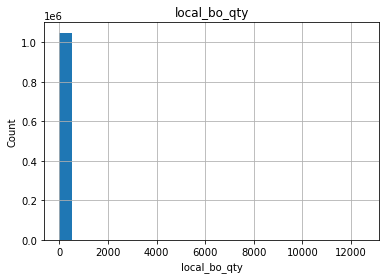

In [12]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=train_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [13]:
#categorical_features
categorical_features=[feature for feature in train_data.columns if train_data[feature].dtypes=='O']
categorical_features

['potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

In [14]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(train_data[feature].unique())))

The feature is potential_issue and number of categories are 2
The feature is deck_risk and number of categories are 2
The feature is oe_constraint and number of categories are 2
The feature is ppap_risk and number of categories are 2
The feature is stop_auto_buy and number of categories are 2
The feature is rev_stop and number of categories are 2
The feature is went_on_backorder and number of categories are 2


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1048575 non-null  int64  
 1   national_inv       1048575 non-null  int64  
 2   lead_time          984057 non-null   float64
 3   in_transit_qty     1048575 non-null  int64  
 4   forecast_3_month   1048575 non-null  int64  
 5   forecast_6_month   1048575 non-null  int64  
 6   forecast_9_month   1048575 non-null  int64  
 7   sales_1_month      1048575 non-null  int64  
 8   sales_3_month      1048575 non-null  int64  
 9   sales_6_month      1048575 non-null  int64  
 10  sales_9_month      1048575 non-null  int64  
 11  min_bank           1048575 non-null  int64  
 12  potential_issue    1048575 non-null  object 
 13  pieces_past_due    1048575 non-null  int64  
 14  perf_6_month_avg   1048575 non-null  float64
 15  perf_12_month_avg  1048575 non-n

# Feature Engineering

In [16]:
#Filling nan values of lead_time column with mean value

In [17]:
train_data['lead_time'] = train_data['lead_time'].fillna((train_data['lead_time'].mean()))
train_data.isnull().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [25]:
train_data.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0,7.841783,0,0,0,0,0,0,0,0,0,No,0,-99.00,-99.00,0,No,No,No,Yes,No,No
1,1043384,2,9.000000,0,0,0,0,0,0,0,0,0,No,0,0.99,0.99,0,No,No,No,Yes,No,No
2,1043696,2,7.841783,0,0,0,0,0,0,0,0,0,No,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No
3,1043852,7,8.000000,0,0,0,0,0,0,0,0,1,No,0,0.10,0.13,0,No,No,No,Yes,No,No
4,1044048,8,7.841783,0,0,0,0,0,0,0,4,2,No,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No


In [26]:
#checking outliers

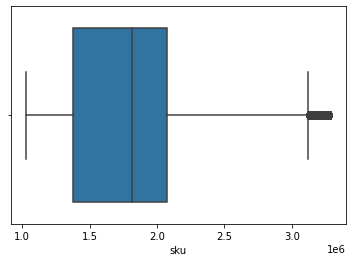

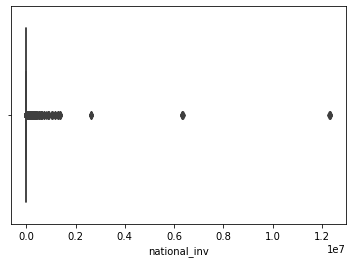

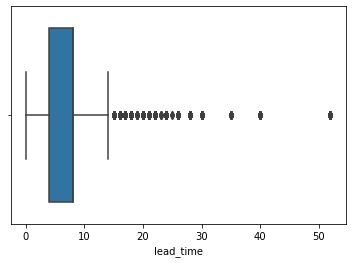

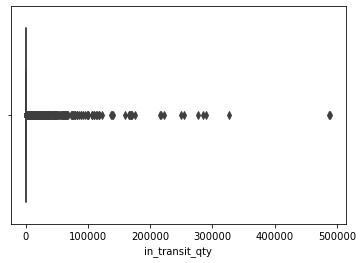

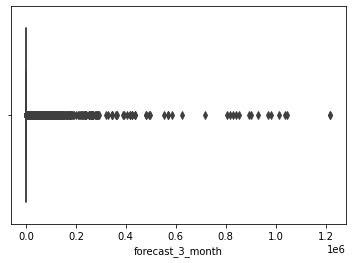

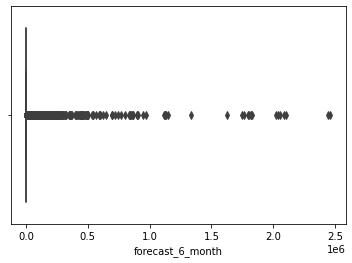

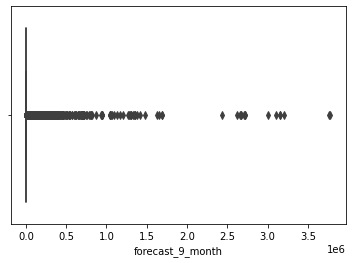

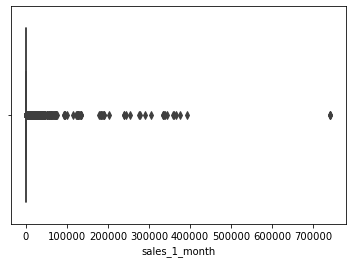

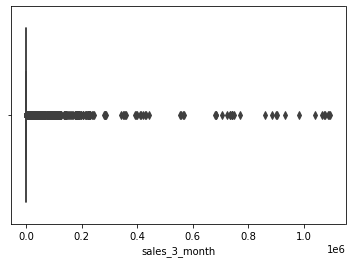

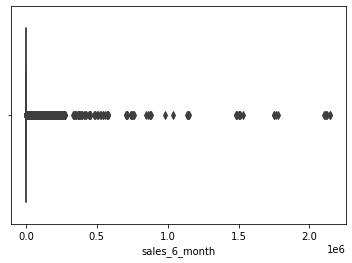

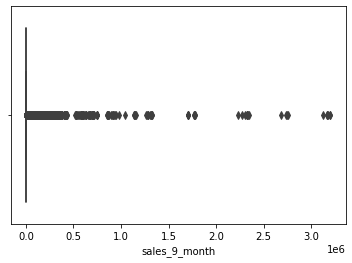

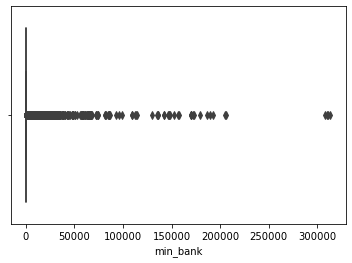

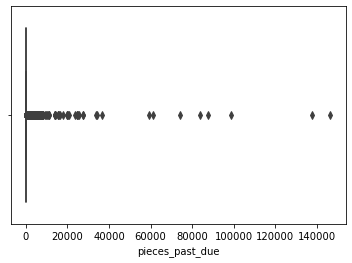

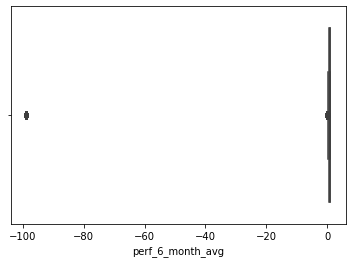

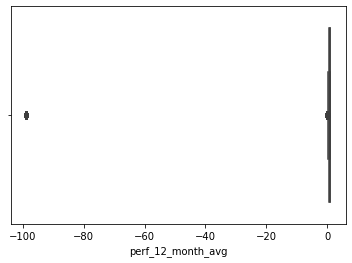

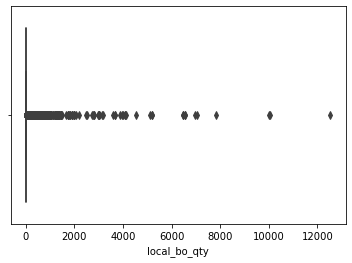

In [27]:
for i in numerical_features:
    sns.boxplot(train_data[i].dropna())
    plt.show()

In [28]:
# IQR RANGE
for k, v in train_data[numerical_features].items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        inter_q = q3 - q1
        v_col = v[(v <= q1 - 1.5 * inter_q) | (v >= q3 + 1.5 * inter_q)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column sku outliers = 0.62%
Column national_inv outliers = 15.10%
Column lead_time outliers = 3.42%
Column in_transit_qty outliers = 100.00%
Column forecast_3_month outliers = 19.68%
Column forecast_6_month outliers = 20.37%
Column forecast_9_month outliers = 19.60%
Column sales_1_month outliers = 18.83%
Column sales_3_month outliers = 17.60%
Column sales_6_month outliers = 17.38%
Column sales_9_month outliers = 17.46%
Column min_bank outliers = 21.28%
Column pieces_past_due outliers = 100.00%
Column perf_6_month_avg outliers = 11.34%
Column perf_12_month_avg outliers = 11.80%
Column local_bo_qty outliers = 100.00%


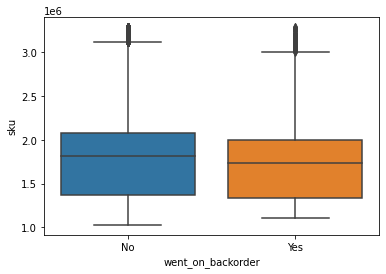

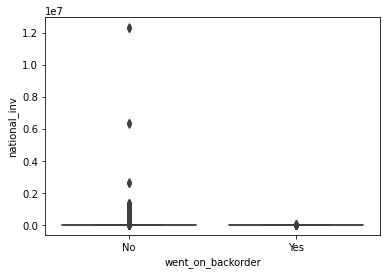

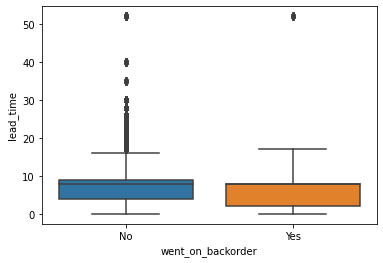

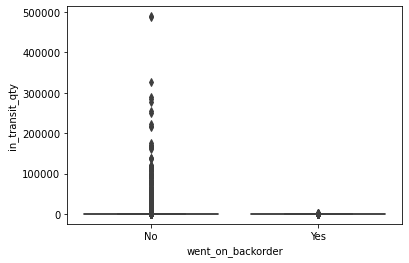

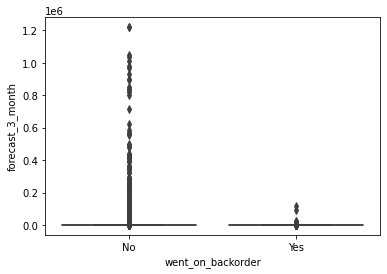

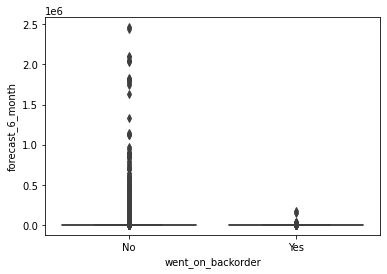

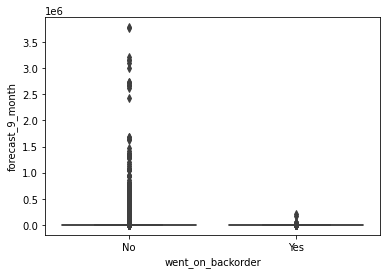

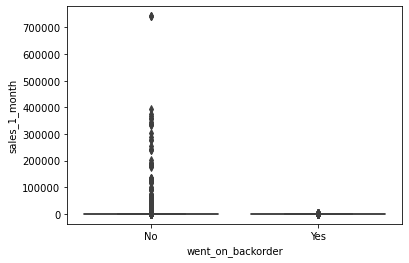

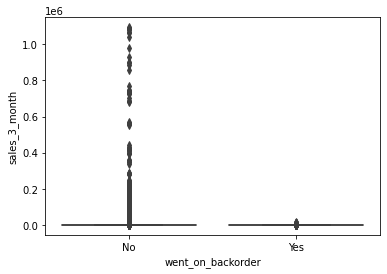

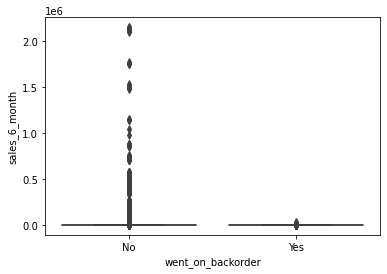

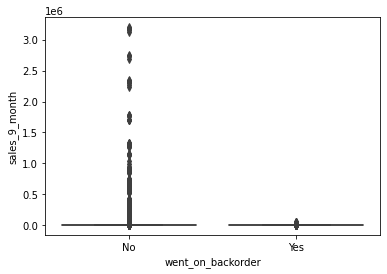

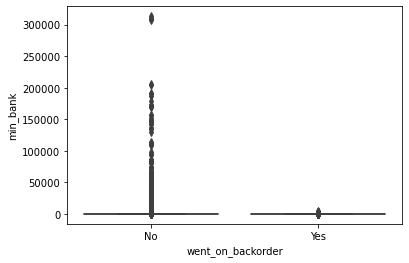

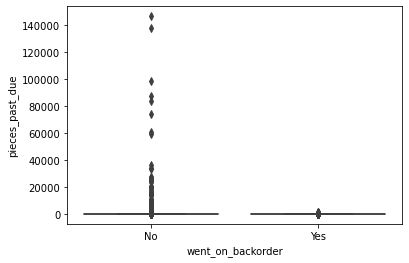

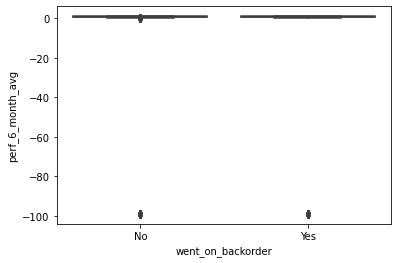

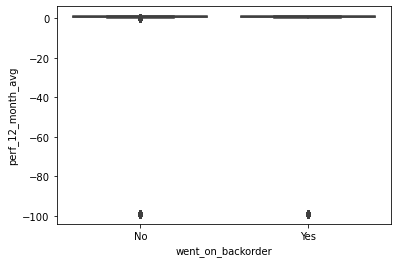

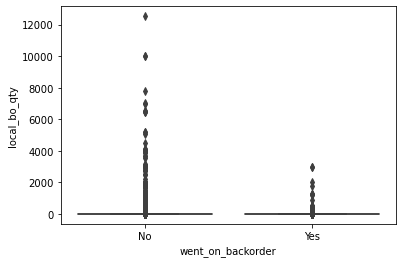

In [29]:
## Box plot
for column in numerical_features:
    sns.boxplot(x = "went_on_backorder",y = column,data = df)
    plt.show()

In [30]:
#Outliers Treatment

In [31]:
import matplotlib.pyplot as plt
def plot_boxplot(train_data,ft):
    train_data.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

In [32]:
def outliers(train_data,ft):
    Q1 = train_data[ft].quantile(0.25)
    Q3 = train_data[ft].quantile(0.75)
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = train_data.index[ (train_data[ft] < lower_bound) | (train_data[ft] > upper_bound)]
    
    return ls

In [33]:
index_list = []
for ft in ['lead_time','national_inv','sales_3_month','sales_6_month','sales_9_month','min_bank']:
    index_list.extend(outliers(train_data,ft))

In [34]:
index_list

[117,
 119,
 133,
 194,
 220,
 223,
 229,
 239,
 252,
 255,
 261,
 262,
 311,
 317,
 326,
 345,
 388,
 440,
 489,
 506,
 590,
 668,
 672,
 738,
 796,
 800,
 806,
 808,
 817,
 857,
 1021,
 1208,
 1242,
 1272,
 1321,
 1348,
 1384,
 1400,
 1406,
 1478,
 1532,
 1571,
 1586,
 1606,
 1663,
 1676,
 1694,
 1727,
 1739,
 1745,
 1746,
 1795,
 1799,
 1834,
 1850,
 1869,
 1914,
 1957,
 1969,
 1987,
 2043,
 2119,
 2136,
 2148,
 2161,
 2169,
 2209,
 2218,
 2288,
 2418,
 2461,
 2491,
 2535,
 2642,
 2686,
 2760,
 2890,
 2897,
 2941,
 2989,
 2993,
 3075,
 3114,
 3229,
 3256,
 3286,
 3320,
 3334,
 3364,
 3528,
 3554,
 3586,
 3593,
 3634,
 3641,
 3702,
 3844,
 3854,
 3867,
 3880,
 3898,
 3899,
 3901,
 3915,
 3942,
 3980,
 3987,
 3990,
 3991,
 3995,
 3996,
 4050,
 4145,
 4150,
 4229,
 4230,
 4332,
 4533,
 4541,
 4664,
 4712,
 4717,
 4828,
 4829,
 4831,
 4856,
 4924,
 4939,
 4944,
 4961,
 4962,
 4967,
 5025,
 5112,
 5123,
 5155,
 5185,
 5191,
 5202,
 5233,
 5291,
 5297,
 5384,
 5504,
 5535,
 5569,
 5625,
 

In [35]:
def remove(train_data,ls):
    ls = sorted(set(ls))
    train_data = train_data.drop(ls)
    return train_data

In [36]:
train_data=train_data_cleaned = remove(train_data,index_list)

In [37]:
train_data.shape

(737058, 23)

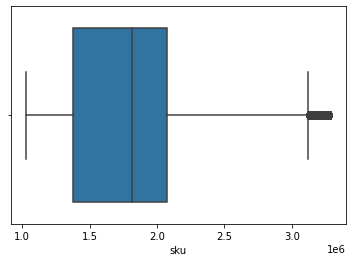

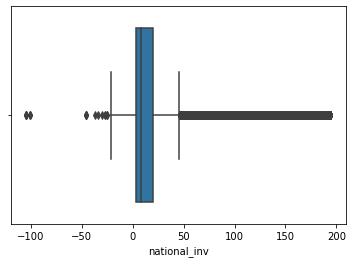

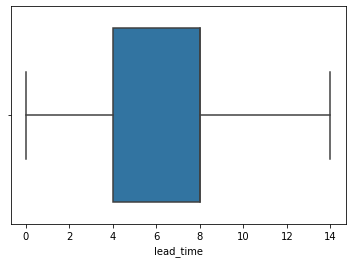

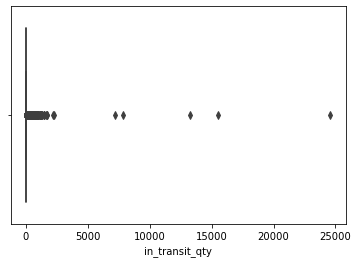

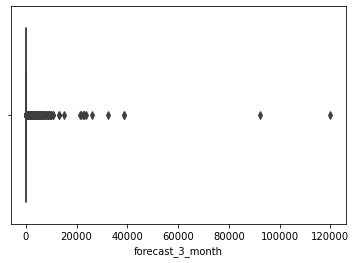

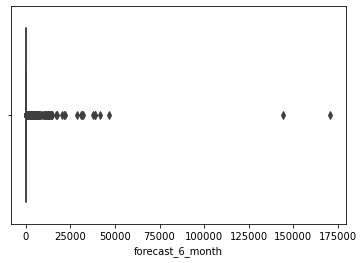

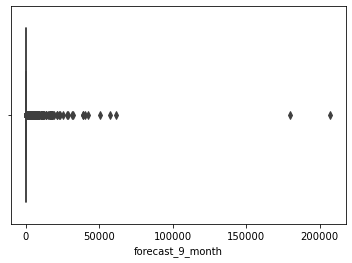

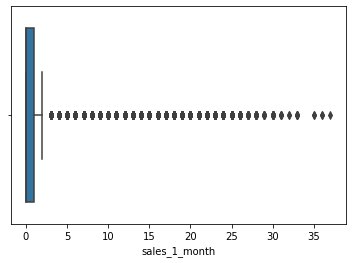

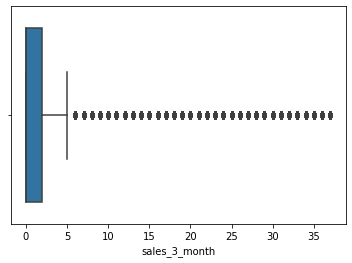

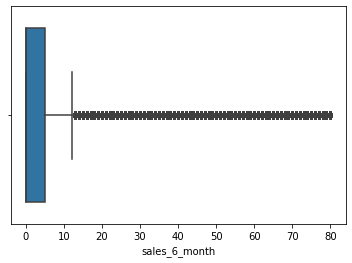

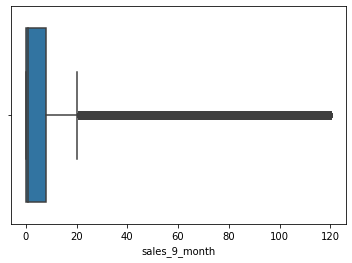

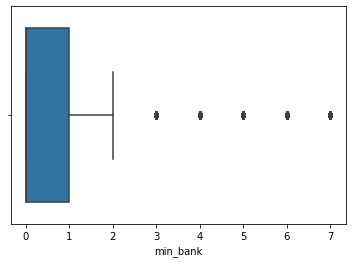

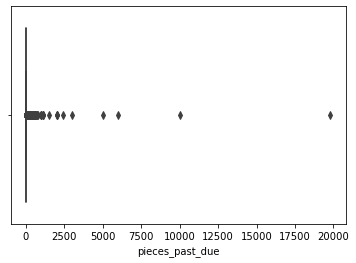

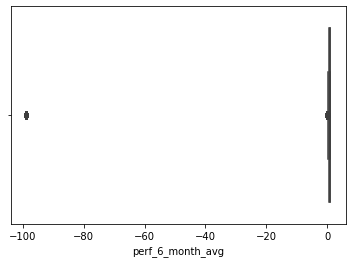

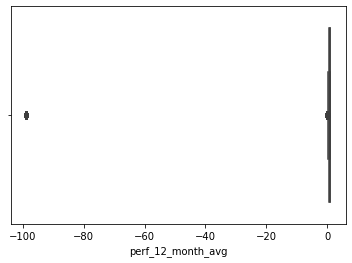

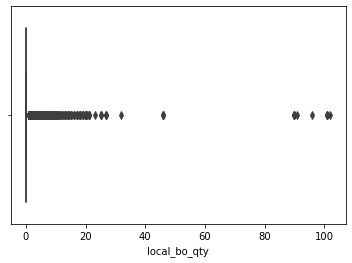

In [38]:
for i in numerical_features:
    sns.boxplot(train_data[i].dropna())
    plt.show()

In [39]:
# IQR RANGE
for k, v in train_data[numerical_features].items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        inter_q = q3 - q1
        v_col = v[(v <= q1 - 1.5 * inter_q) | (v >= q3 + 1.5 * inter_q)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column sku outliers = 0.38%
Column national_inv outliers = 8.33%
Column lead_time outliers = 0.42%
Column in_transit_qty outliers = 70.29%
Column forecast_3_month outliers = 70.29%
Column forecast_6_month outliers = 15.29%
Column forecast_9_month outliers = 15.21%
Column sales_1_month outliers = 7.75%
Column sales_3_month outliers = 12.61%
Column sales_6_month outliers = 10.04%
Column sales_9_month outliers = 9.70%
Column min_bank outliers = 4.38%
Column pieces_past_due outliers = 70.29%
Column perf_6_month_avg outliers = 8.04%
Column perf_12_month_avg outliers = 8.33%
Column local_bo_qty outliers = 70.29%


In [40]:
#Converting categorical variables to numerical variables using Labelencoder

In [41]:
train_data['potential_issue'].value_counts()

No     736767
Yes       291
Name: potential_issue, dtype: int64

<AxesSubplot:xlabel='potential_issue', ylabel='count'>

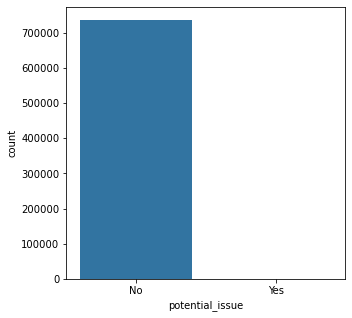

In [42]:
plt.figure(figsize = (5,5))
sns.countplot(train_data.potential_issue)

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [44]:
train_data['potential_issue'] = le.fit_transform(train_data['potential_issue'])

In [45]:
train_data['potential_issue'].value_counts()

0    736767
1       291
Name: potential_issue, dtype: int64

<AxesSubplot:xlabel='potential_issue', ylabel='count'>

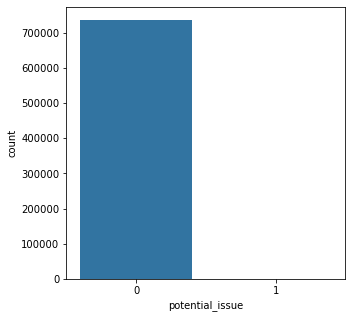

In [46]:
plt.figure(figsize = (5,5))
sns.countplot(train_data.potential_issue)

In [47]:
train_data['deck_risk'].value_counts()

No     529739
Yes    207319
Name: deck_risk, dtype: int64

<AxesSubplot:xlabel='deck_risk', ylabel='count'>

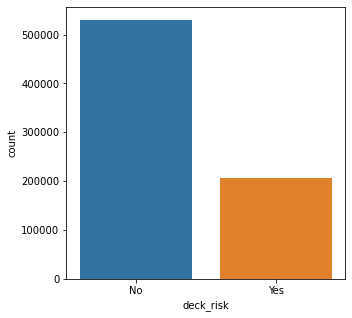

In [48]:
plt.figure(figsize = (5,5))
sns.countplot(train_data.deck_risk)

In [49]:
train_data['deck_risk'] = le.fit_transform(train_data['deck_risk'])

In [50]:
train_data['deck_risk'].value_counts()

0    529739
1    207319
Name: deck_risk, dtype: int64

<AxesSubplot:xlabel='deck_risk', ylabel='count'>

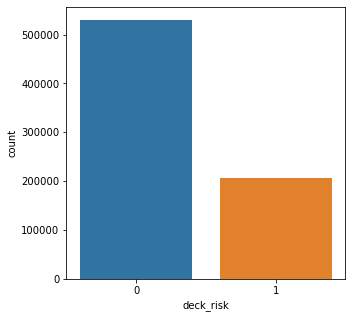

In [51]:
plt.figure(figsize = (5,5))
sns.countplot(train_data.deck_risk)

In [52]:
train_data['oe_constraint'].value_counts()

No     737008
Yes        50
Name: oe_constraint, dtype: int64

<AxesSubplot:xlabel='oe_constraint', ylabel='count'>

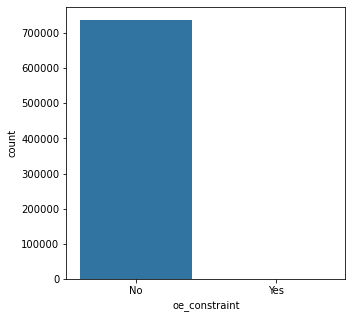

In [53]:
plt.figure(figsize = (5,5))
sns.countplot(train_data.oe_constraint)

In [54]:
train_data['oe_constraint'] = le.fit_transform(train_data['oe_constraint'])

In [55]:
train_data['oe_constraint'].value_counts()

0    737008
1        50
Name: oe_constraint, dtype: int64

<AxesSubplot:xlabel='oe_constraint', ylabel='count'>

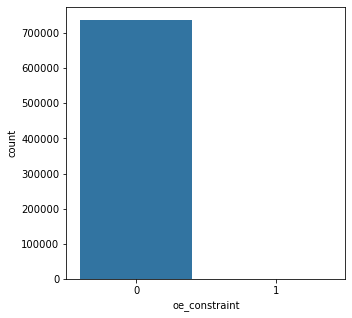

In [56]:
plt.figure(figsize = (5,5))
sns.countplot(train_data.oe_constraint)

In [57]:
train_data['ppap_risk'].value_counts()

No     646787
Yes     90271
Name: ppap_risk, dtype: int64

<AxesSubplot:xlabel='ppap_risk', ylabel='count'>

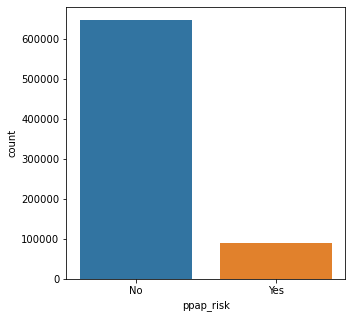

In [58]:
plt.figure(figsize = (5,5))
sns.countplot(train_data.ppap_risk)

In [59]:
train_data['ppap_risk'] = le.fit_transform(train_data['ppap_risk'])

In [60]:
train_data['ppap_risk'].value_counts()

0    646787
1     90271
Name: ppap_risk, dtype: int64

<AxesSubplot:xlabel='ppap_risk', ylabel='count'>

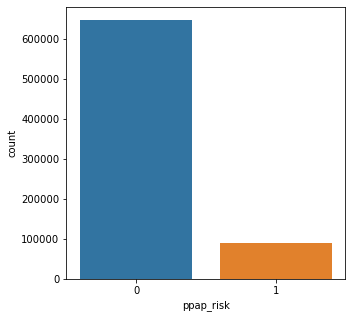

In [61]:
plt.figure(figsize = (5,5))
sns.countplot(train_data.ppap_risk)

In [62]:
train_data['stop_auto_buy'].value_counts()

Yes    720751
No      16307
Name: stop_auto_buy, dtype: int64

<AxesSubplot:xlabel='stop_auto_buy', ylabel='count'>

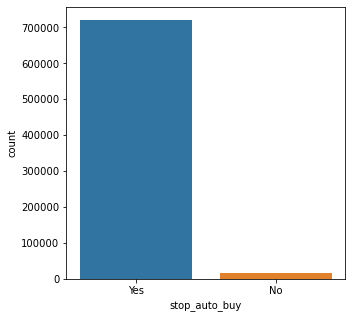

In [63]:
plt.figure(figsize = (5,5))
sns.countplot(train_data.stop_auto_buy)

In [64]:
train_data['stop_auto_buy'] = le.fit_transform(train_data['stop_auto_buy'])

In [65]:
train_data['stop_auto_buy'].value_counts()

1    720751
0     16307
Name: stop_auto_buy, dtype: int64

<AxesSubplot:xlabel='stop_auto_buy', ylabel='count'>

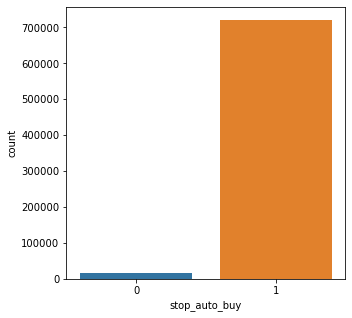

In [66]:
plt.figure(figsize = (5,5))
sns.countplot(train_data.stop_auto_buy)

In [67]:
train_data['rev_stop'].value_counts()

No     736830
Yes       228
Name: rev_stop, dtype: int64

<AxesSubplot:xlabel='rev_stop', ylabel='count'>

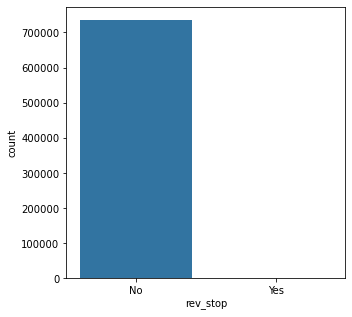

In [68]:
plt.figure(figsize = (5,5))
sns.countplot(train_data.rev_stop)

In [69]:
train_data['rev_stop'] = le.fit_transform(train_data['rev_stop'])

In [70]:
train_data['rev_stop'].value_counts()

0    736830
1       228
Name: rev_stop, dtype: int64

<AxesSubplot:xlabel='rev_stop', ylabel='count'>

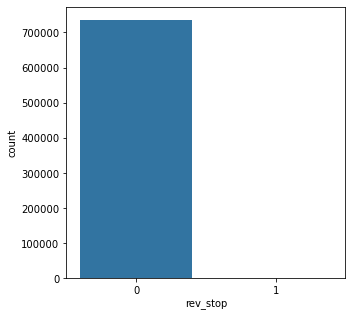

In [71]:
plt.figure(figsize = (5,5))
sns.countplot(train_data.rev_stop)

In [72]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737058 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sku                737058 non-null  int64  
 1   national_inv       737058 non-null  int64  
 2   lead_time          737058 non-null  float64
 3   in_transit_qty     737058 non-null  int64  
 4   forecast_3_month   737058 non-null  int64  
 5   forecast_6_month   737058 non-null  int64  
 6   forecast_9_month   737058 non-null  int64  
 7   sales_1_month      737058 non-null  int64  
 8   sales_3_month      737058 non-null  int64  
 9   sales_6_month      737058 non-null  int64  
 10  sales_9_month      737058 non-null  int64  
 11  min_bank           737058 non-null  int64  
 12  potential_issue    737058 non-null  int32  
 13  pieces_past_due    737058 non-null  int64  
 14  perf_6_month_avg   737058 non-null  float64
 15  perf_12_month_avg  737058 non-null  float64
 16  l

In [73]:
#converting float columns into int
train_data['lead_time'] = train_data['lead_time'].astype(int, errors = 'raise')

In [74]:
train_data['perf_6_month_avg'] = train_data['perf_6_month_avg'].astype(int, errors = 'raise')

In [75]:
train_data['perf_12_month_avg'] = train_data['perf_12_month_avg'].astype(int, errors = 'raise')

In [76]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737058 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   sku                737058 non-null  int64 
 1   national_inv       737058 non-null  int64 
 2   lead_time          737058 non-null  int32 
 3   in_transit_qty     737058 non-null  int64 
 4   forecast_3_month   737058 non-null  int64 
 5   forecast_6_month   737058 non-null  int64 
 6   forecast_9_month   737058 non-null  int64 
 7   sales_1_month      737058 non-null  int64 
 8   sales_3_month      737058 non-null  int64 
 9   sales_6_month      737058 non-null  int64 
 10  sales_9_month      737058 non-null  int64 
 11  min_bank           737058 non-null  int64 
 12  potential_issue    737058 non-null  int32 
 13  pieces_past_due    737058 non-null  int64 
 14  perf_6_month_avg   737058 non-null  int32 
 15  perf_12_month_avg  737058 non-null  int32 
 16  local_bo_qty       

In [77]:
train_data.describe()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
count,7.370580e+05,737058.000000,737058.000000,737058.000000,737058.000000,737058.000000,737058.000000,737058.000000,737058.000000,737058.000000,737058.000000,737058.000000,737058.000000,737058.000000,737058.000000,737058.000000,737058.000000,737058.000000,737058.000000,737058.000000,737058.000000,737058.000000
mean,1.771114e+06,19.237576,6.897121,0.876168,5.988080,9.082467,11.987978,0.828146,2.670455,5.443743,8.191382,0.615521,0.000395,0.206623,-7.674252,-7.408736,0.012148,0.281279,0.000068,0.122475,0.977876,0.000309
std,3.950253e+05,30.565280,3.332282,41.135175,220.442058,314.590336,389.434065,2.038273,5.541832,10.943936,16.326086,1.172735,0.019866,28.666980,26.600499,26.087045,0.481371,0.449624,0.008236,0.327834,0.147088,0.017585
min,1.026827e+06,-105.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.373497e+06,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.810411e+06,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.071298e+06,20.000000,8.000000,0.000000,0.000000,1.000000,2.000000,1.000000,2.000000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,3.284914e+06,194.000000,14.000000,24582.000000,120000.000000,170880.000000,207160.000000,37.000000,37.000000,80.000000,120.000000,7.000000,1.000000,19791.000000,1.000000,1.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
#checking skewness of columns

In [79]:
'''for i in train_data.describe().columns:
    sns.distplot(train_data[i].dropna())
    plt.show()'''

'for i in train_data.describe().columns:\n    sns.distplot(train_data[i].dropna())\n    plt.show()'

In [80]:
train_data.corr()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
sku,1.000000,-0.007721,-0.003286,0.003471,0.000842,-0.000142,-0.000508,-0.005171,-0.000205,0.001130,0.000078,-0.004625,0.007286,0.004939,-0.019170,-0.019442,0.001523,0.002926,0.000372,-0.000665,-0.005232,0.001547
national_inv,-0.007721,1.000000,-0.042603,0.006416,0.002078,0.004295,0.006346,0.150483,0.177559,0.199461,0.211672,0.147013,-0.010524,-0.002282,-0.090614,-0.086588,-0.021327,-0.014501,-0.004726,0.003876,-0.062877,-0.009739
lead_time,-0.003286,-0.042603,1.000000,-0.004352,-0.005231,-0.005596,-0.005261,-0.080043,-0.074723,-0.063926,-0.048280,0.051351,-0.014901,-0.001362,0.001210,-0.001310,0.002115,-0.206235,-0.002613,-0.024737,0.045204,0.012397
in_transit_qty,0.003471,0.006416,-0.004352,1.000000,0.169824,0.156495,0.166368,0.011259,0.014849,0.014193,0.012909,0.006532,0.002759,0.064700,0.001793,0.001735,0.002723,0.001084,0.000077,-0.003410,0.001546,0.046140
forecast_3_month,0.000842,0.002078,-0.005231,0.169824,1.000000,0.973895,0.964027,0.011787,0.012510,0.011864,0.011425,0.001837,0.064025,0.159834,0.002014,0.003449,0.016001,0.001885,0.005577,0.002375,-0.001449,0.034052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
deck_risk,0.002926,-0.014501,-0.206235,0.001084,0.001885,-0.001404,-0.004221,-0.096836,-0.134015,-0.147019,-0.159800,-0.030010,0.012022,0.000161,-0.202900,-0.205317,-0.004874,1.000000,0.008037,0.033124,-0.053240,-0.010490
oe_constraint,0.000372,-0.004726,-0.002613,0.000077,0.005577,0.004689,0.003789,-0.000356,-0.000283,0.003354,0.004081,0.001998,-0.000164,0.001642,0.002376,0.002339,0.069604,0.008037,1.000000,0.006470,0.001239,-0.000145
ppap_risk,-0.000665,0.003876,-0.024737,-0.003410,0.002375,0.001672,0.000823,-0.025871,-0.031448,-0.032540,-0.033073,0.005005,0.013199,0.000921,-0.037023,-0.036063,-0.001613,0.033124,0.006470,1.000000,-0.031338,0.032259
stop_auto_buy,-0.005232,-0.062877,0.045204,0.001546,-0.001449,-0.001579,-0.001572,-0.004523,-0.010824,-0.015729,-0.018555,-0.089490,0.002525,0.000800,0.222287,0.225054,-0.002068,-0.053240,0.001239,-0.031338,1.000000,-0.101211


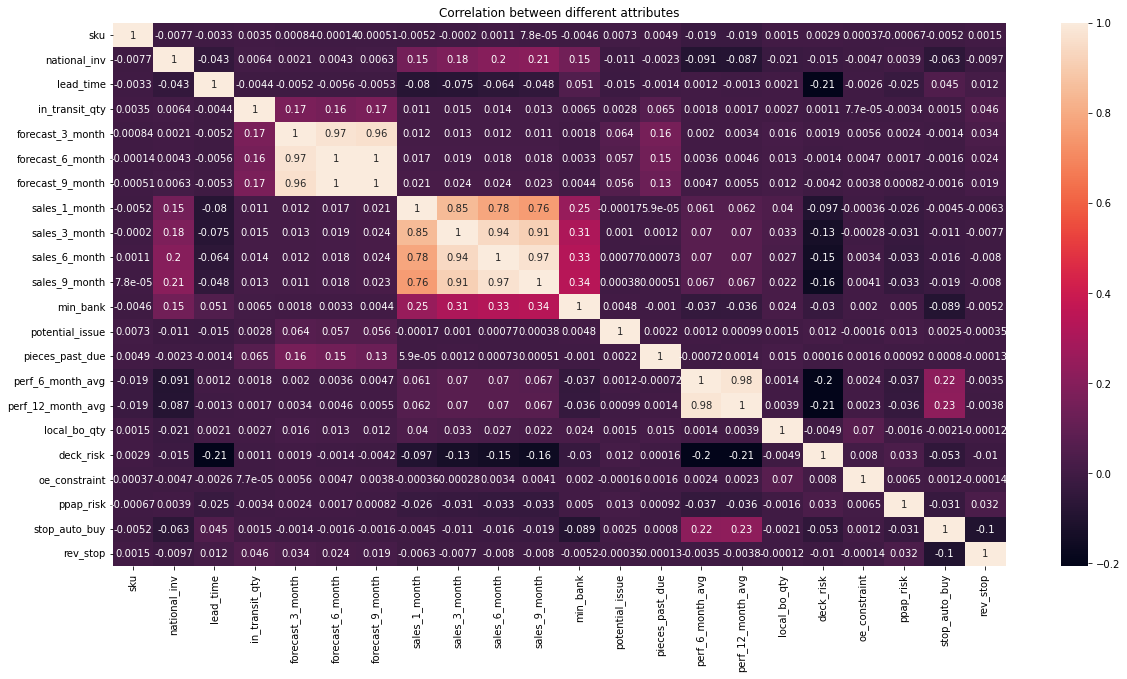

In [81]:
plt.figure(figsize = (20,10))
sns.heatmap(train_data.corr() , annot=True)
plt.title('Correlation between different attributes')
plt.show()

<AxesSubplot:>

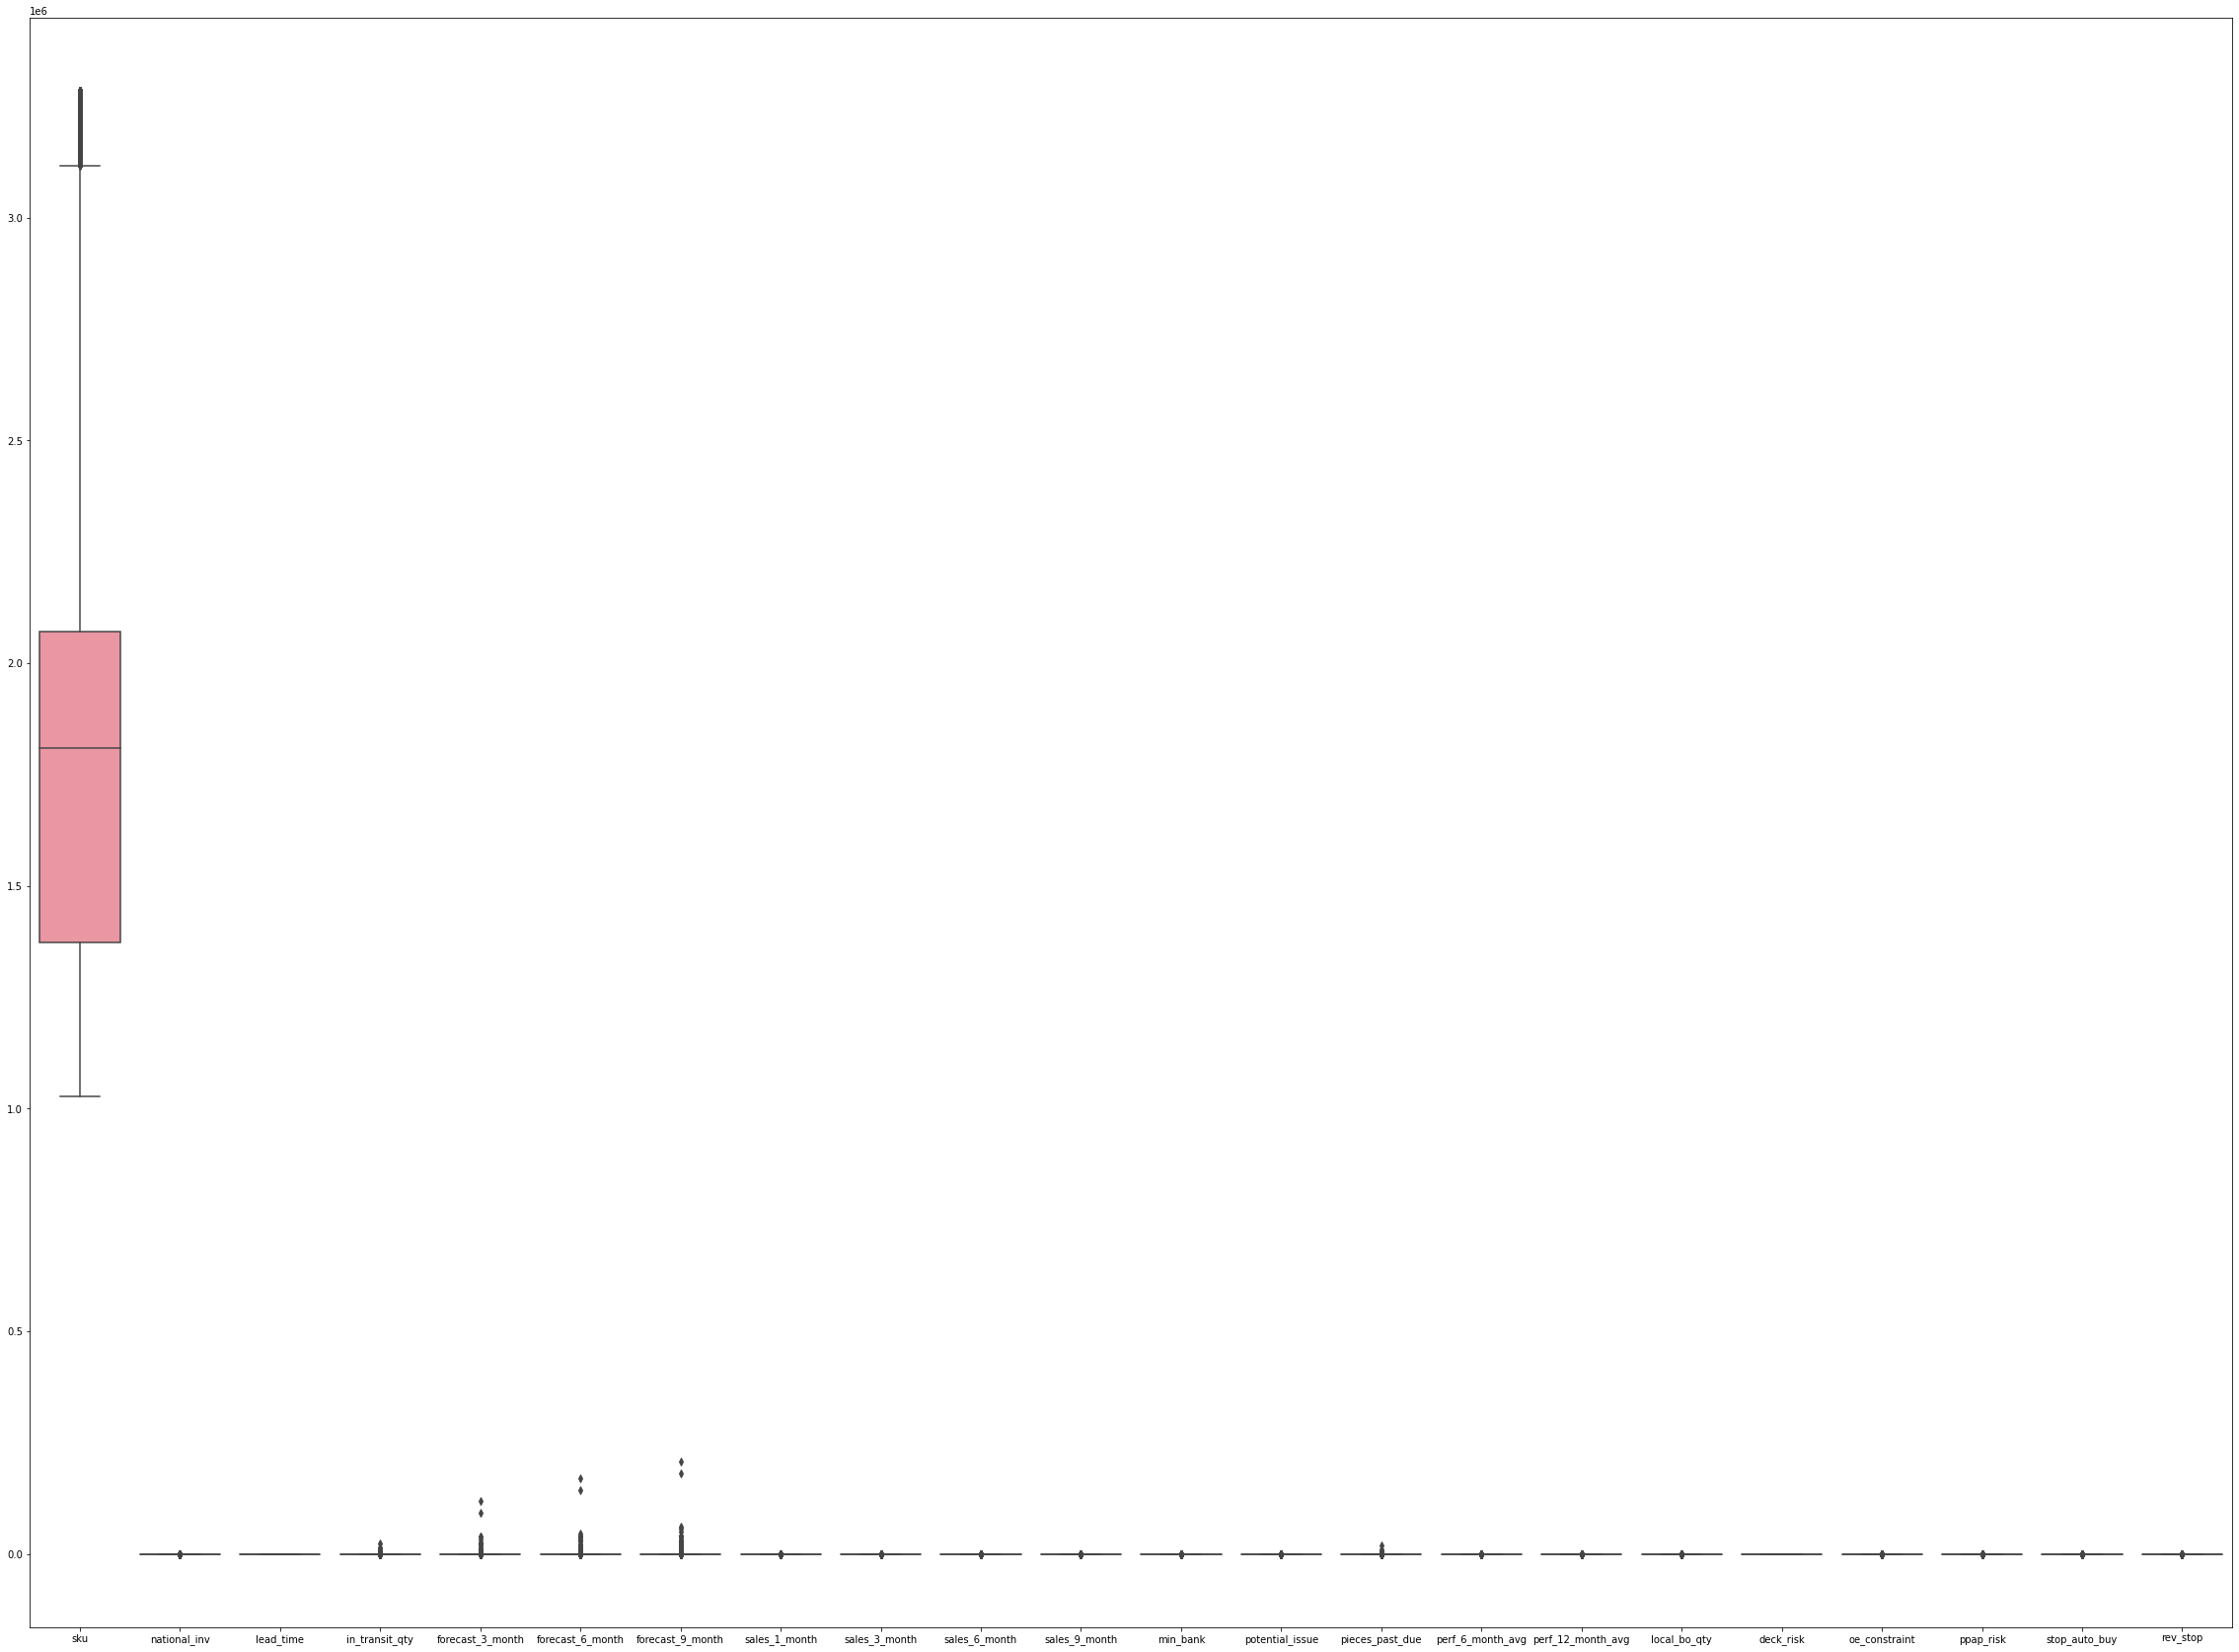

In [82]:
fig , ax = plt.subplots(figsize = (40,30))
sns.boxplot(data = train_data ,ax = ax)

In [83]:
train_data.skew().sort_values(ascending = False)

pieces_past_due      528.643490
in_transit_qty       427.151751
forecast_6_month     373.579839
forecast_9_month     363.928690
forecast_3_month     352.414557
local_bo_qty         132.969340
oe_constraint        121.401071
rev_stop              56.830661
potential_issue       50.297674
sales_1_month          4.105050
sales_3_month          2.994265
sales_6_month          2.957263
sales_9_month          2.957162
national_inv           2.918982
min_bank               2.744509
ppap_risk              2.303158
deck_risk              0.972909
sku                    0.215575
lead_time             -0.208310
perf_6_month_avg      -3.141642
perf_12_month_avg     -3.226068
stop_auto_buy         -6.497820
dtype: float64

In [84]:
# full correlation table
train_data.corr().style.background_gradient(cmap='viridis')

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
sku,1.000000,-0.007721,-0.003286,0.003471,0.000842,-0.000142,-0.000508,-0.005171,-0.000205,0.001130,0.000078,-0.004625,0.007286,0.004939,-0.019170,-0.019442,0.001523,0.002926,0.000372,-0.000665,-0.005232,0.001547
national_inv,-0.007721,1.000000,-0.042603,0.006416,0.002078,0.004295,0.006346,0.150483,0.177559,0.199461,0.211672,0.147013,-0.010524,-0.002282,-0.090614,-0.086588,-0.021327,-0.014501,-0.004726,0.003876,-0.062877,-0.009739
lead_time,-0.003286,-0.042603,1.000000,-0.004352,-0.005231,-0.005596,-0.005261,-0.080043,-0.074723,-0.063926,-0.048280,0.051351,-0.014901,-0.001362,0.001210,-0.001310,0.002115,-0.206235,-0.002613,-0.024737,0.045204,0.012397
in_transit_qty,0.003471,0.006416,-0.004352,1.000000,0.169824,0.156495,0.166368,0.011259,0.014849,0.014193,0.012909,0.006532,0.002759,0.064700,0.001793,0.001735,0.002723,0.001084,0.000077,-0.003410,0.001546,0.046140
forecast_3_month,0.000842,0.002078,-0.005231,0.169824,1.000000,0.973895,0.964027,0.011787,0.012510,0.011864,0.011425,0.001837,0.064025,0.159834,0.002014,0.003449,0.016001,0.001885,0.005577,0.002375,-0.001449,0.034052
forecast_6_month,-0.000142,0.004295,-0.005596,0.156495,0.973895,1.000000,0.996036,0.016876,0.018977,0.018386,0.017808,0.003332,0.056641,0.145703,0.003601,0.004599,0.012966,-0.001404,0.004689,0.001672,-0.001579,0.023688
forecast_9_month,-0.000508,0.006346,-0.005261,0.166368,0.964027,0.996036,1.000000,0.020768,0.024122,0.023556,0.022745,0.004389,0.056159,0.125595,0.004689,0.005487,0.012181,-0.004221,0.003789,0.000823,-0.001572,0.019004
sales_1_month,-0.005171,0.150483,-0.080043,0.011259,0.011787,0.016876,0.020768,1.000000,0.847760,0.783900,0.757740,0.249682,-0.000167,0.000059,0.060887,0.061797,0.040386,-0.096836,-0.000356,-0.025871,-0.004523,-0.006276
sales_3_month,-0.000205,0.177559,-0.074723,0.014849,0.012510,0.018977,0.024122,0.847760,1.000000,0.939547,0.911175,0.310142,0.001034,0.001206,0.069551,0.070178,0.032978,-0.134015,-0.000283,-0.031448,-0.010824,-0.007739
sales_6_month,0.001130,0.199461,-0.063926,0.014193,0.011864,0.018386,0.023556,0.783900,0.939547,1.000000,0.971170,0.330334,0.000767,0.000733,0.069549,0.069896,0.027018,-0.147019,0.003354,-0.032540,-0.015729,-0.007975


In [85]:
train_data.skew().sort_values(ascending = False)

pieces_past_due      528.643490
in_transit_qty       427.151751
forecast_6_month     373.579839
forecast_9_month     363.928690
forecast_3_month     352.414557
local_bo_qty         132.969340
oe_constraint        121.401071
rev_stop              56.830661
potential_issue       50.297674
sales_1_month          4.105050
sales_3_month          2.994265
sales_6_month          2.957263
sales_9_month          2.957162
national_inv           2.918982
min_bank               2.744509
ppap_risk              2.303158
deck_risk              0.972909
sku                    0.215575
lead_time             -0.208310
perf_6_month_avg      -3.141642
perf_12_month_avg     -3.226068
stop_auto_buy         -6.497820
dtype: float64

In [86]:
#log transformation

In [87]:
skewed_cols=['pieces_past_due','in_transit_qty','oe_constraint','local_bo_qty','rev_stop','potential_issue']

In [88]:
#Apply log1p transformation on dataframe - just selected values
for c in skewed_cols:
    train_data[c] = train_data[c].apply('log1p')

In [89]:
train_data.skew().sort_values(ascending = False)

forecast_6_month     373.579839
forecast_9_month     363.928690
forecast_3_month     352.414557
oe_constraint        121.401071
rev_stop              56.830661
potential_issue       50.297674
local_bo_qty          25.690830
pieces_past_due       14.333166
in_transit_qty         5.104756
sales_1_month          4.105050
sales_3_month          2.994265
sales_6_month          2.957263
sales_9_month          2.957162
national_inv           2.918982
min_bank               2.744509
ppap_risk              2.303158
deck_risk              0.972909
sku                    0.215575
lead_time             -0.208310
perf_6_month_avg      -3.141642
perf_12_month_avg     -3.226068
stop_auto_buy         -6.497820
dtype: float64

In [90]:
train_data.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

<AxesSubplot:>

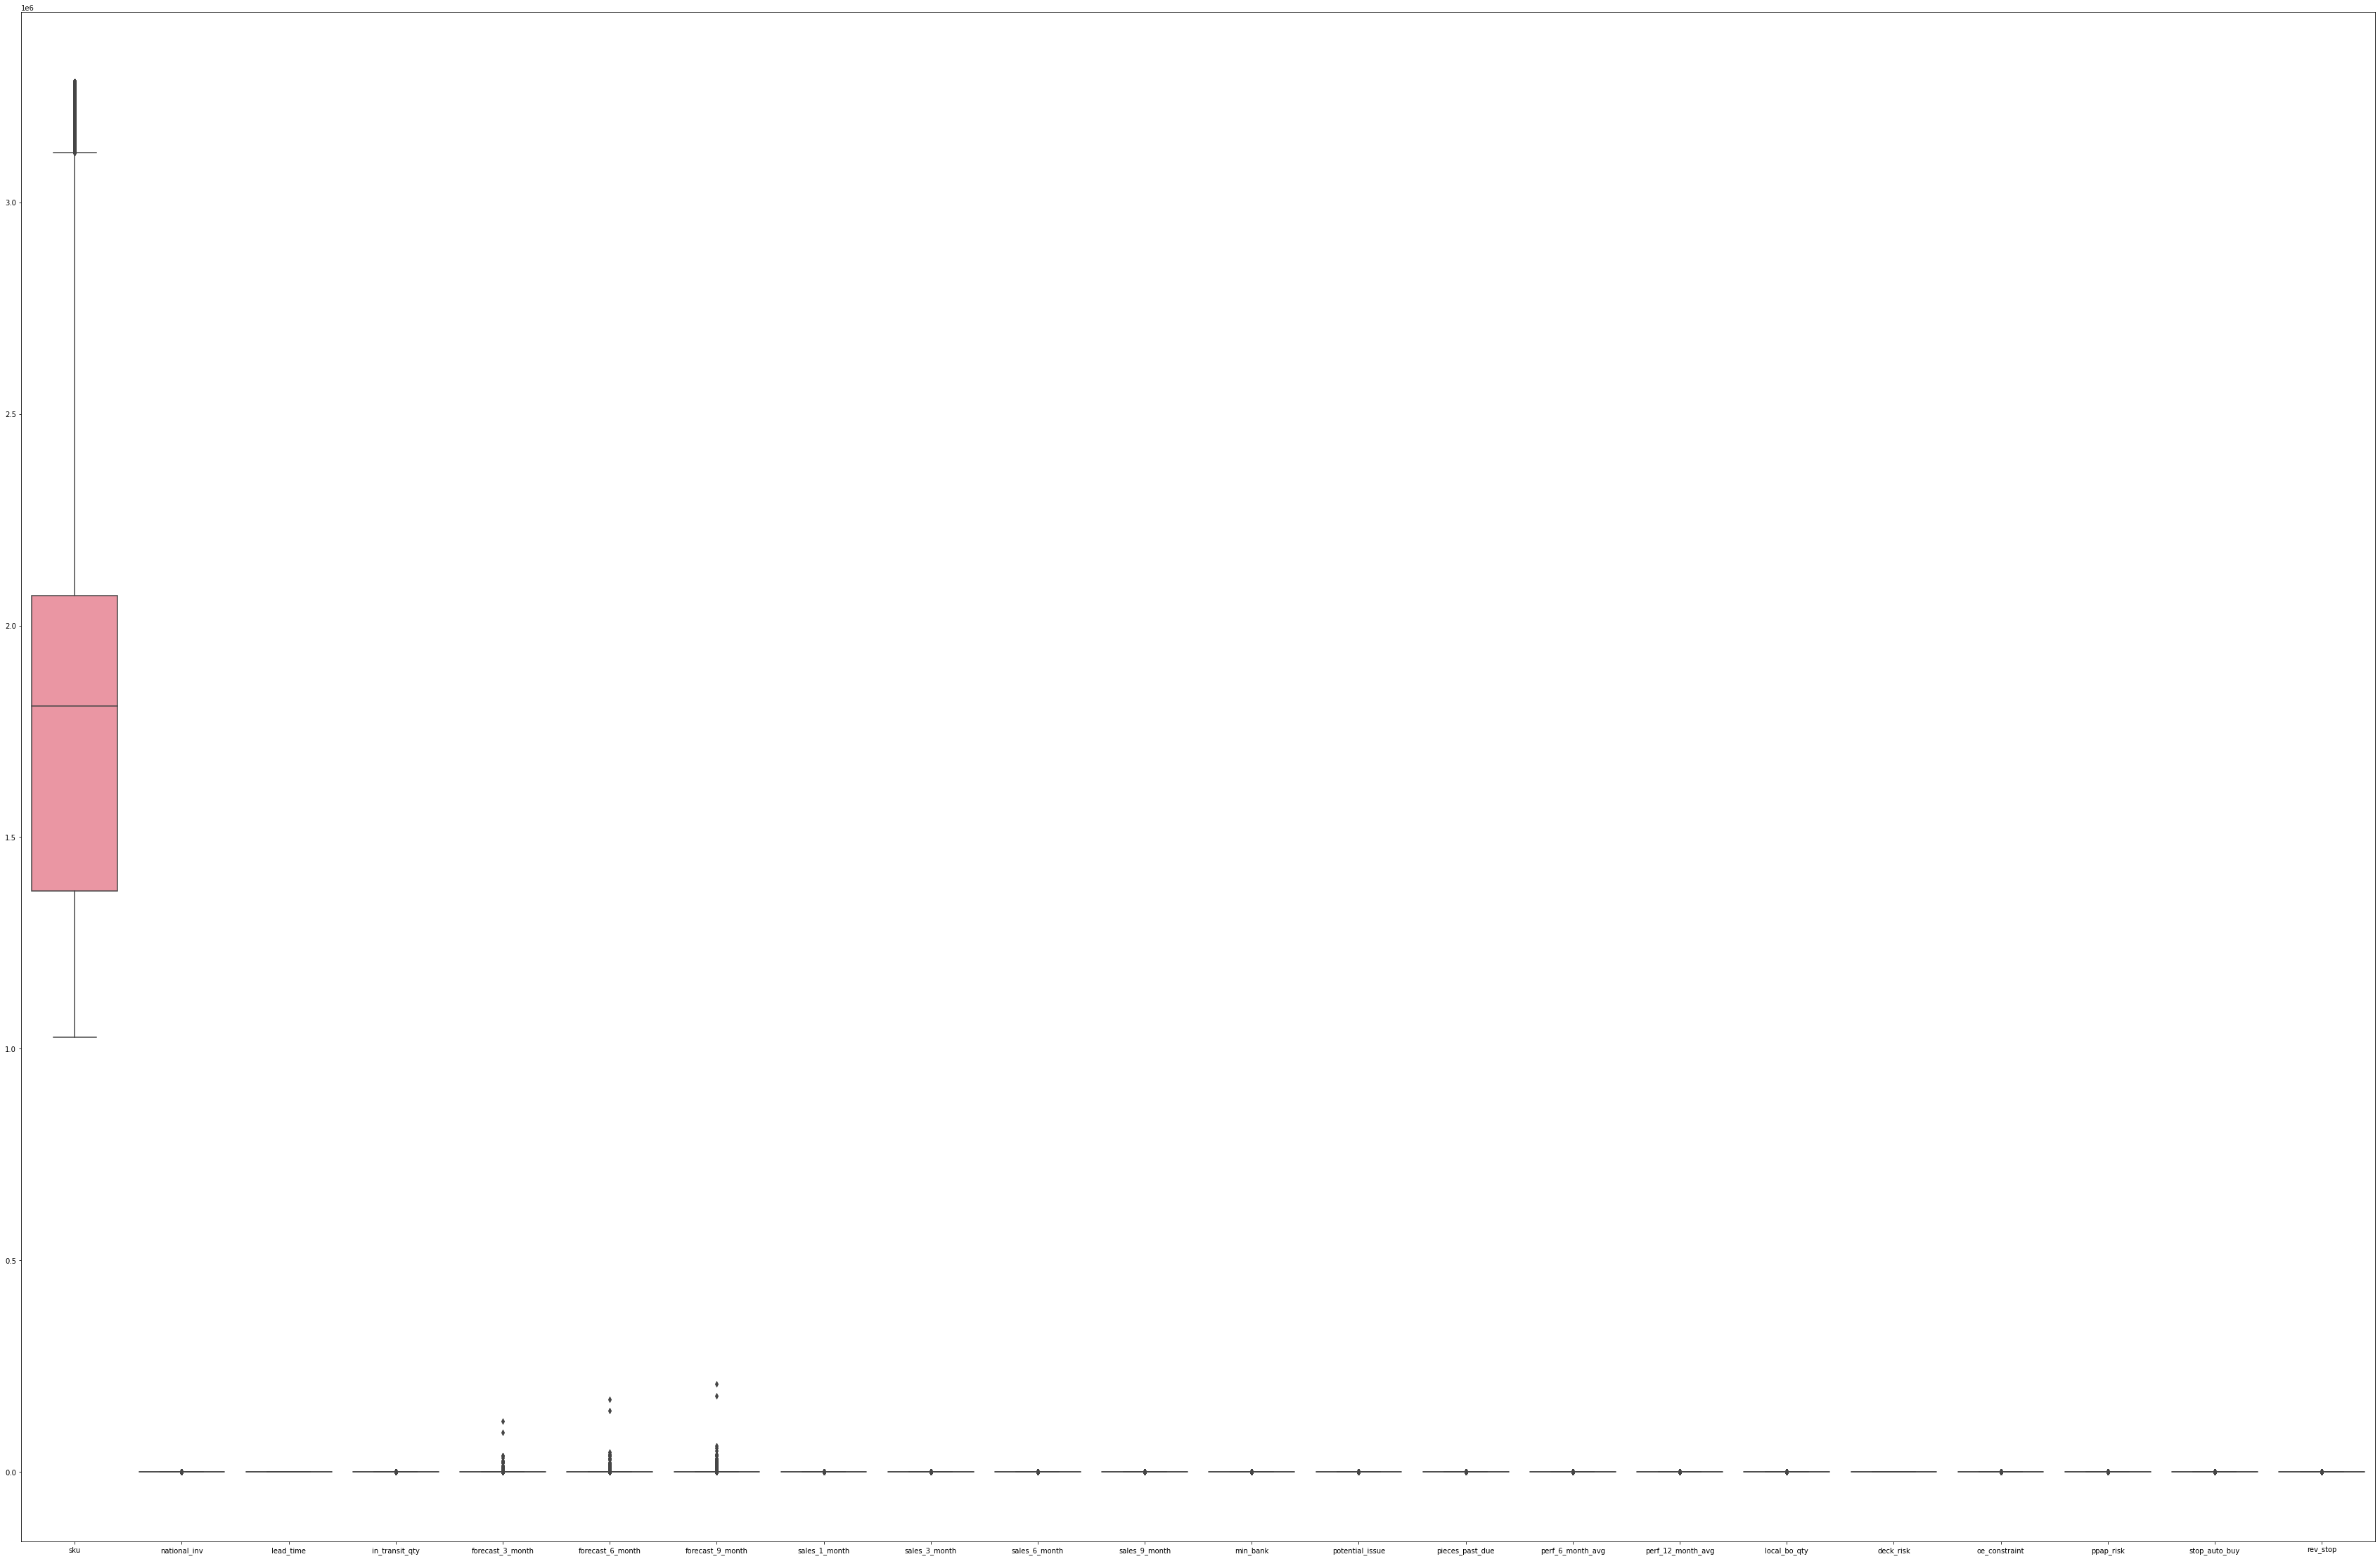

In [91]:
fig , ax = plt.subplots(figsize = (60,40))
sns.boxplot(data = train_data ,ax = ax)

In [92]:
train_data.shape

(737058, 23)

# Test Data

In [189]:
df11 = pd.read_csv(r"Test.csv")
pd.set_option('display.max_columns', None)
df11.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,No,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No


In [190]:
df12=df11.copy()
df12

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,No,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242071,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242072,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242073,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242074,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,88.0,4.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No


In [191]:
test_data = df12
test_data

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,No,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242071,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242072,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242073,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242074,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,88.0,4.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No


In [192]:
test_data.isnull().sum()

sku                      0
national_inv             1
lead_time            14725
in_transit_qty           1
forecast_3_month         1
forecast_6_month         1
forecast_9_month         1
sales_1_month            1
sales_3_month            1
sales_6_month            1
sales_9_month            1
min_bank                 1
potential_issue          1
pieces_past_due          1
perf_6_month_avg         1
perf_12_month_avg        1
local_bo_qty             1
deck_risk                1
oe_constraint            1
ppap_risk                1
stop_auto_buy            1
rev_stop                 1
went_on_backorder        1
dtype: int64

In [194]:
#Dropping last row as it of no use
test_data.drop(index=test_data.index[-1],axis=0,inplace=True)
test_data

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,No,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242070,3526987,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242071,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242072,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242073,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No


In [195]:
test_data.isnull().sum()

sku                      0
national_inv             0
lead_time            14724
in_transit_qty           0
forecast_3_month         0
forecast_6_month         0
forecast_9_month         0
sales_1_month            0
sales_3_month            0
sales_6_month            0
sales_9_month            0
min_bank                 0
potential_issue          0
pieces_past_due          0
perf_6_month_avg         0
perf_12_month_avg        0
local_bo_qty             0
deck_risk                0
oe_constraint            0
ppap_risk                0
stop_auto_buy            0
rev_stop                 0
went_on_backorder        0
dtype: int64

In [196]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242075 entries, 0 to 242074
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sku                242075 non-null  object 
 1   national_inv       242075 non-null  float64
 2   lead_time          227351 non-null  float64
 3   in_transit_qty     242075 non-null  float64
 4   forecast_3_month   242075 non-null  float64
 5   forecast_6_month   242075 non-null  float64
 6   forecast_9_month   242075 non-null  float64
 7   sales_1_month      242075 non-null  float64
 8   sales_3_month      242075 non-null  float64
 9   sales_6_month      242075 non-null  float64
 10  sales_9_month      242075 non-null  float64
 11  min_bank           242075 non-null  float64
 12  potential_issue    242075 non-null  object 
 13  pieces_past_due    242075 non-null  float64
 14  perf_6_month_avg   242075 non-null  float64
 15  perf_12_month_avg  242075 non-null  float64
 16  lo

# Feature Engineering

In [197]:
test_data['lead_time'] = test_data['lead_time'].fillna((test_data['lead_time'].mean()))
test_data.isnull().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [199]:
#checking numerical features length
numerical_features1 = [feature for feature in test_data.columns if test_data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features1))

Number of numerical variables:  15


In [200]:
# IQR RANGE
for k, v in test_data[numerical_features1].items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        inter_q = q3 - q1
        v_col = v[(v <= q1 - 1.5 * inter_q) | (v >= q3 + 1.5 * inter_q)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column national_inv outliers = 3.47%
Column lead_time outliers = 0.80%
Column in_transit_qty outliers = 23.09%
Column forecast_3_month outliers = 4.94%
Column forecast_6_month outliers = 4.68%
Column forecast_9_month outliers = 4.60%
Column sales_1_month outliers = 4.10%
Column sales_3_month outliers = 4.07%
Column sales_6_month outliers = 4.04%
Column sales_9_month outliers = 4.02%
Column min_bank outliers = 4.88%
Column pieces_past_due outliers = 23.09%
Column perf_6_month_avg outliers = 2.59%
Column perf_12_month_avg outliers = 2.74%
Column local_bo_qty outliers = 23.09%


In [201]:
#outlier treatment

import matplotlib.pyplot as plt
def plot_boxplot(test_data,ft):
    test_data.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

In [202]:
def outliers(test_data,ft):
    Q1 = test_data[ft].quantile(0.25)
    Q3 = test_data[ft].quantile(0.75)
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = test_data.index[ (test_data[ft] < lower_bound) | (test_data[ft] > upper_bound)]
    
    return ls

In [203]:
index_list = []
for ft in ['lead_time','national_inv','sales_3_month','sales_6_month','sales_9_month','min_bank']:
    index_list.extend(outliers(test_data,ft))

In [204]:
index_list

[13,
 54,
 83,
 219,
 402,
 407,
 443,
 512,
 657,
 685,
 704,
 712,
 763,
 775,
 822,
 837,
 894,
 1097,
 1117,
 1172,
 1181,
 1249,
 1261,
 1274,
 1290,
 1328,
 1447,
 1470,
 1497,
 1498,
 1530,
 1690,
 1713,
 1715,
 1760,
 1762,
 1769,
 1778,
 1785,
 1804,
 1808,
 1822,
 1923,
 1955,
 2024,
 2049,
 2057,
 2068,
 2162,
 2232,
 2233,
 2258,
 2299,
 2303,
 2304,
 2310,
 2386,
 2391,
 2421,
 2443,
 2472,
 2478,
 2506,
 2531,
 2532,
 2534,
 2583,
 2648,
 2672,
 2689,
 2728,
 2749,
 2774,
 2795,
 2933,
 2987,
 2989,
 3040,
 3043,
 3086,
 3104,
 3184,
 3259,
 3262,
 3346,
 3451,
 3475,
 3505,
 3636,
 3652,
 3709,
 3729,
 3748,
 3807,
 3874,
 3886,
 3889,
 3900,
 3927,
 4051,
 4063,
 4110,
 4115,
 4228,
 4304,
 4372,
 4400,
 4449,
 4501,
 4539,
 4565,
 4635,
 4642,
 4713,
 4741,
 4812,
 4817,
 4820,
 4829,
 4903,
 4956,
 5042,
 5214,
 5254,
 5591,
 5756,
 5987,
 5992,
 6070,
 6124,
 6255,
 6488,
 6636,
 6642,
 6721,
 6738,
 6806,
 6972,
 7100,
 7342,
 7576,
 7708,
 7747,
 7860,
 7953,
 7964

In [205]:
def remove(test_data,ls):
    ls = sorted(set(ls))
    test_data = test_data.drop(ls)
    return test_data

In [206]:
test_data.shape

(242075, 23)

In [207]:
test_data=test_data_cleaned = remove(test_data,index_list)

In [208]:
test_data.shape

(170282, 23)

In [209]:
#Converting categorical variables to numerical variables using Labelencoder

In [210]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [211]:
test_data['potential_issue'] = le.fit_transform(test_data['potential_issue'])
test_data['deck_risk'] = le.fit_transform(test_data['deck_risk'])
test_data['oe_constraint'] = le.fit_transform(test_data['oe_constraint'])
test_data['ppap_risk'] = le.fit_transform(test_data['ppap_risk'])
test_data['stop_auto_buy'] = le.fit_transform(test_data['stop_auto_buy'])
test_data['rev_stop'] = le.fit_transform(test_data['rev_stop'])

In [212]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170282 entries, 0 to 242073
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sku                170282 non-null  object 
 1   national_inv       170282 non-null  float64
 2   lead_time          170282 non-null  float64
 3   in_transit_qty     170282 non-null  float64
 4   forecast_3_month   170282 non-null  float64
 5   forecast_6_month   170282 non-null  float64
 6   forecast_9_month   170282 non-null  float64
 7   sales_1_month      170282 non-null  float64
 8   sales_3_month      170282 non-null  float64
 9   sales_6_month      170282 non-null  float64
 10  sales_9_month      170282 non-null  float64
 11  min_bank           170282 non-null  float64
 12  potential_issue    170282 non-null  int32  
 13  pieces_past_due    170282 non-null  float64
 14  perf_6_month_avg   170282 non-null  float64
 15  perf_12_month_avg  170282 non-null  float64
 16  lo

In [214]:
test_data.corr()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
national_inv,1.000000,-0.044330,0.023467,0.002693,0.008345,0.011818,0.138433,0.171952,0.194247,0.206031,0.145748,-0.005926,-0.005336,-0.091383,-0.087711,-0.024436,-0.004361,-0.000389,0.005471,-0.048975,-0.009727
lead_time,-0.044330,1.000000,-0.010436,-0.004632,-0.007518,-0.008159,-0.087788,-0.094767,-0.079252,-0.065996,0.047082,-0.010543,-0.000025,-0.052630,-0.057173,0.005783,-0.110230,-0.003773,-0.016226,0.022829,0.012698
in_transit_qty,0.023467,-0.010436,1.000000,0.287777,0.380999,0.416458,0.022784,0.030823,0.030351,0.028337,0.011380,0.024953,0.347413,0.007794,0.007779,0.001834,0.000563,-0.000380,-0.006161,0.003349,-0.000679
forecast_3_month,0.002693,-0.004632,0.287777,1.000000,0.973344,0.934992,0.023949,0.030468,0.028748,0.028289,0.001256,0.098018,0.184787,0.006338,0.009562,0.029832,0.011023,0.006932,-0.001980,-0.046854,-0.000832
forecast_6_month,0.008345,-0.007518,0.380999,0.973344,1.000000,0.988602,0.037647,0.048552,0.047325,0.046404,0.006756,0.106541,0.211645,0.008916,0.011496,0.024468,0.002489,0.005425,-0.003694,-0.037790,-0.000990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
deck_risk,-0.004361,-0.110230,0.000563,0.011023,0.002489,-0.004109,-0.093119,-0.125792,-0.141328,-0.147867,-0.002123,0.007898,-0.000585,-0.253248,-0.256457,-0.006635,1.000000,0.001990,0.038343,-0.129286,-0.009368
oe_constraint,-0.000389,-0.003773,-0.000380,0.006932,0.005425,0.004378,0.002645,0.003781,0.002519,0.007860,-0.002044,-0.000139,-0.000083,0.002625,0.002564,0.007607,0.001990,1.000000,0.005739,0.001635,-0.000168
ppap_risk,0.005471,-0.016226,-0.006161,-0.001980,-0.003694,-0.004902,-0.024299,-0.032172,-0.033593,-0.034086,0.006565,0.001006,0.001084,-0.036654,-0.035458,0.001101,0.038343,0.005739,1.000000,-0.023099,0.032241
stop_auto_buy,-0.048975,0.022829,0.003349,-0.046854,-0.037790,-0.030222,-0.004328,-0.007727,-0.013505,-0.017070,-0.064369,0.002418,0.001358,0.188383,0.190818,0.000276,-0.129286,0.001635,-0.023099,1.000000,-0.090217


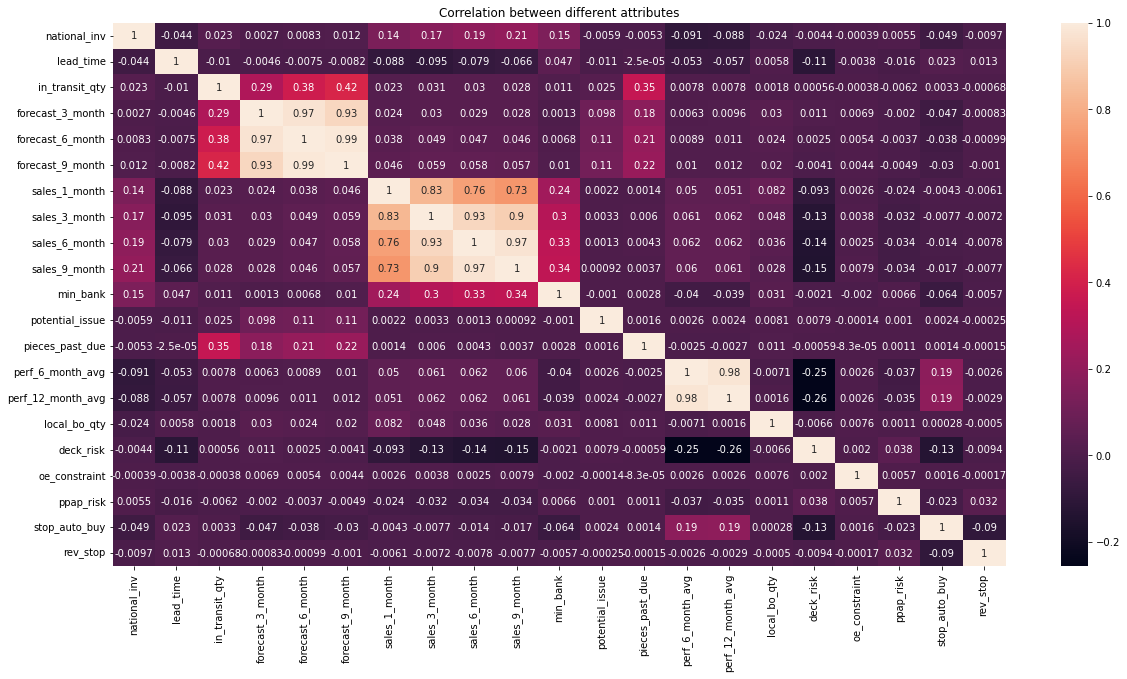

In [215]:
plt.figure(figsize = (20,10))
sns.heatmap(test_data.corr() , annot=True)
plt.title('Correlation between different attributes')
plt.show()

In [216]:
test_data.skew().sort_values(ascending = False)

pieces_past_due      325.201120
in_transit_qty       215.895241
forecast_9_month     135.241578
forecast_3_month     128.143536
local_bo_qty         127.195755
forecast_6_month     126.036036
oe_constraint        103.149467
potential_issue       69.730093
rev_stop              57.757439
sales_1_month          4.304624
sales_3_month          3.004790
national_inv           2.935607
sales_9_month          2.932790
sales_6_month          2.923890
min_bank               2.708772
ppap_risk              2.337890
deck_risk              1.306488
sku                    0.000289
lead_time             -0.288297
perf_6_month_avg      -3.168786
perf_12_month_avg     -3.256800
stop_auto_buy         -5.761076
dtype: float64

In [217]:
skewed_cols=['pieces_past_due','in_transit_qty','oe_constraint','local_bo_qty','rev_stop','potential_issue']

In [218]:
#Apply log1p transformation on dataframe - just selected values
for c in skewed_cols:
    test_data[c] = test_data[c].apply('log1p')

In [219]:
test_data.skew().sort_values(ascending = False)

forecast_9_month     135.241578
forecast_3_month     128.143536
forecast_6_month     126.036036
oe_constraint        103.149467
potential_issue       69.730093
rev_stop              57.757439
local_bo_qty          25.739665
pieces_past_due       22.419209
in_transit_qty         6.048660
sales_1_month          4.304624
sales_3_month          3.004790
national_inv           2.935607
sales_9_month          2.932790
sales_6_month          2.923890
min_bank               2.708772
ppap_risk              2.337890
deck_risk              1.306488
sku                    0.000289
lead_time             -0.288297
perf_6_month_avg      -3.168786
perf_12_month_avg     -3.256800
stop_auto_buy         -5.761076
dtype: float64

In [221]:
test_data.shape

(170282, 23)

In [94]:
#feature selection using pearson correlation

# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

'''def correlation(train_data, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = train_data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(x_train, 0.7)
len(set(corr_features))

corr_features

#x_train.drop(corr_features,axis=1)
#x_test.drop(corr_features,axis=1)'''

'def correlation(train_data, threshold):\n    col_corr = set()  # Set of all the names of correlated columns\n    corr_matrix = train_data.corr()\n    for i in range(len(corr_matrix.columns)):\n        for j in range(i):\n            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value\n                colname = corr_matrix.columns[i]  # getting the name of column\n                col_corr.add(colname)\n    return col_corr\n\ncorr_features = correlation(x_train, 0.7)\nlen(set(corr_features))\n\ncorr_features\n\n#x_train.drop(corr_features,axis=1)\n#x_test.drop(corr_features,axis=1)'

In [95]:
X = train_data.drop(columns=['went_on_backorder','sku','forecast_6_month',
 'forecast_9_month',
 'perf_12_month_avg',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month'])

In [96]:
X.shape

(737058, 15)

In [97]:
Y = train_data['went_on_backorder']

In [98]:
Y.shape

(737058,)

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x_train, x_test, y_train, y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 1234)

In [101]:
x_train.shape

(589646, 15)

In [102]:
x_test.shape

(147412, 15)

In [103]:
y_train.shape

(589646,)

In [104]:
y_test.shape

(147412,)

In [105]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)

# transform testing dataabs
X_test_norm = norm.transform(x_test)

In [106]:
X_train_norm.shape

(589646, 15)

In [107]:
X_test_norm.shape

(147412, 15)

In [108]:
#SMOTE
!pip install imblearn

In [109]:
'''from imblearn.under_sampling import RandomUnderSampler

nm = RandomUnderSampler(random_state=42)
x_train_smote,y_train_smote = nm.fit_resample(x_train,y_train)'''

'from imblearn.under_sampling import RandomUnderSampler\n\nnm = RandomUnderSampler(random_state=42)\nx_train_smote,y_train_smote = nm.fit_resample(x_train,y_train)'

In [110]:
'''from imblearn.under_sampling import NearMiss

nm = NearMiss()
x_train_smote,y_train_smote = nm.fit_resample(X_train_norm,y_train)'''

'from imblearn.under_sampling import NearMiss\n\nnm = NearMiss()\nx_train_smote,y_train_smote = nm.fit_resample(X_train_norm,y_train)'

In [111]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority',random_state=2)

x_train_smote,y_train_smote = smote.fit_resample(X_train_norm,y_train)

In [112]:
#from imblearn.combine import SMOTETomek

In [113]:
'''smote = SMOTETomek(random_state=42)
x_train_smote,y_train_smote = smote.fit_resample(X_train_norm,y_train)'''

'smote = SMOTETomek(random_state=42)\nx_train_smote,y_train_smote = smote.fit_resample(X_train_norm,y_train)'

In [114]:
X_train_norm.shape,y_train.shape

((589646, 15), (589646,))

In [115]:
x_train_smote.shape,y_train.shape

((1168934, 15), (589646,))

In [116]:
x_train_smote.shape,y_train_smote.shape

((1168934, 15), (1168934,))

In [117]:
y_train.value_counts()

No     584467
Yes      5179
Name: went_on_backorder, dtype: int64

In [118]:
y_train_smote.value_counts()

No     584467
Yes    584467
Name: went_on_backorder, dtype: int64

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
logr_liblinear = LogisticRegression(verbose=1,solver='liblinear')

In [121]:
logr_liblinear.fit(x_train_smote,y_train_smote)

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [122]:
logr_liblinear.score(x_train_smote,y_train_smote)

0.8270039198106993

In [123]:
Y_pred_log=logr_liblinear.predict(X_test_norm)

In [124]:
Y_pred_log1=logr_liblinear.predict(x_train_smote)

In [125]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [126]:
confusion_matrix(y_test,Y_pred_log)

array([[117531,  28566],
       [   216,   1099]], dtype=int64)

In [127]:
print ("Accuracy : ", accuracy_score(y_test, Y_pred_log))

Accuracy :  0.8047513092556915


In [128]:
from sklearn.metrics import classification_report,confusion_matrix

In [129]:
print(classification_report(y_test,Y_pred_log))

              precision    recall  f1-score   support

          No       1.00      0.80      0.89    146097
         Yes       0.04      0.84      0.07      1315

    accuracy                           0.80    147412
   macro avg       0.52      0.82      0.48    147412
weighted avg       0.99      0.80      0.88    147412



In [130]:
#random_forest_classifier

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
clf = RandomForestClassifier(n_estimators = 100)

In [133]:
clf.fit(x_train_smote,y_train_smote)

RandomForestClassifier()

In [134]:
clf.score(x_train_smote,y_train_smote)

0.9666328466791111

In [135]:
y_pred_rf = clf.predict(X_test_norm)

In [136]:
print ("Accuracy : ", accuracy_score(y_test, y_pred_rf))

Accuracy :  0.9644126665400374


In [137]:
y_pred_rf1 = clf.predict(x_train_smote)

In [138]:
print(clf)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train_smote, y_pred_rf1))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred_rf))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred_rf))

RandomForestClassifier()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

          No       0.96      0.97      0.97    584467
         Yes       0.97      0.96      0.97    584467

    accuracy                           0.97   1168934
   macro avg       0.97      0.97      0.97   1168934
weighted avg       0.97      0.97      0.97   1168934

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

          No       0.99      0.97      0.98    146097
         Yes       0.11      0.43      0.18      1315

    accuracy                           0.96    147412
   macro avg       0.55      0.70      0.58    147412
weighted avg       0.99      0.96      0.97    147412

Confusion matrix
-------------------------------------------------------
[[141607   4490]
 [   756    559]]


In [139]:
#Hyperparameter Tuning on RandomForest
from sklearn.model_selection import RandomizedSearchCV

In [140]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [141]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [142]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [143]:
rf_random.fit(x_train_smote,y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=13.3min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=13.2min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=12.9min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=13.0min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=12.9min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=19.3min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=19.4min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [144]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 10}

In [145]:
rf_new = RandomForestClassifier(n_estimators=900,min_samples_split=5,min_samples_leaf=5,max_features='sqrt',max_depth=10)

In [146]:
rf_new.fit(x_train_smote,y_train_smote)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, n_estimators=900)

In [147]:
y_pred_rg = rf_new.predict(X_test_norm)

In [148]:
y_pred_rg_train = rf_new.predict(x_train_smote)

In [149]:
confusion_matrix(y_test, y_pred_rg)

array([[126517,  19580],
       [   215,   1100]], dtype=int64)

In [150]:
print ("Accuracy : ", accuracy_score(y_test, y_pred_rg))

Accuracy :  0.8657164952649716


In [151]:
print(rf_new)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train_smote, y_pred_rg_train))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred_rg))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred_rg))

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, n_estimators=900)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

          No       0.90      0.86      0.88    584467
         Yes       0.87      0.90      0.89    584467

    accuracy                           0.88   1168934
   macro avg       0.89      0.88      0.88   1168934
weighted avg       0.89      0.88      0.88   1168934

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

          No       1.00      0.87      0.93    146097
         Yes       0.05      0.84      0.10      1315

    accuracy                           0.87    147412
   macro avg       0.53      0.85      0.51    147412
weighted avg       0.99      0.87      0.92    147412

Confusion matrix
------------------------------------------

In [152]:
!pip install lightgbm

In [153]:
import lightgbm as lgb
light = lgb.LGBMClassifier()
light.fit(x_train_smote,y_train_smote)

LGBMClassifier()

In [154]:
lgb_pred=light.predict(X_test_norm)

In [155]:
light.score(x_train_smote,y_train_smote)

0.9297975762532359

In [156]:
print ("Accuracy : ", accuracy_score(y_test, lgb_pred))

Accuracy :  0.9286082544161941


In [157]:
confusion_matrix(y_test, lgb_pred)

array([[135989,  10108],
       [   416,    899]], dtype=int64)

In [158]:
print(classification_report(y_test, lgb_pred))

              precision    recall  f1-score   support

          No       1.00      0.93      0.96    146097
         Yes       0.08      0.68      0.15      1315

    accuracy                           0.93    147412
   macro avg       0.54      0.81      0.55    147412
weighted avg       0.99      0.93      0.96    147412



In [159]:
from lightgbm import LGBMClassifier

In [160]:
from sklearn.model_selection import GridSearchCV, KFold

In [161]:
lgb_tuned =LGBMClassifier(random_state=3,n_jobs=-1)

params = {'n_estimators':np.arange(80,120)}

gscv = GridSearchCV(lgb_tuned,param_grid=params,cv=3,scoring='f1',n_jobs=-1,verbose=True)
gscv.fit(x_train_smote,y_train_smote)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=3), n_jobs=-1,
             param_grid={'n_estimators': array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119])},
             scoring='f1', verbose=True)

In [162]:
gscv.best_params_

{'n_estimators': 80}

In [163]:
lgb_tuned = LGBMClassifier(random_state=3,n_jobs=-1,n_estimators=80)

In [164]:
lgb_tuned.fit(x_train_smote,y_train_smote)

LGBMClassifier(n_estimators=80, random_state=3)

In [165]:
lgb_tuned.score(x_train_smote,y_train_smote)

0.9254414706048417

In [166]:
lgb_pred1=lgb_tuned.predict(X_test_norm)

In [167]:
lgb_pred_train=lgb_tuned.predict(x_train_smote)

In [168]:
print ("Accuracy : ", accuracy_score(y_test, lgb_pred1))

Accuracy :  0.924646568800369


In [169]:
confusion_matrix(y_test, lgb_pred1)

array([[135368,  10729],
       [   379,    936]], dtype=int64)

In [170]:
from sklearn.metrics import classification_report

In [171]:
print(lgb_tuned)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train_smote, lgb_pred_train))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, lgb_pred1))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, lgb_pred1))

LGBMClassifier(n_estimators=80, random_state=3)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

          No       0.93      0.93      0.93    584467
         Yes       0.93      0.93      0.93    584467

    accuracy                           0.93   1168934
   macro avg       0.93      0.93      0.93   1168934
weighted avg       0.93      0.93      0.93   1168934

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

          No       1.00      0.93      0.96    146097
         Yes       0.08      0.71      0.14      1315

    accuracy                           0.92    147412
   macro avg       0.54      0.82      0.55    147412
weighted avg       0.99      0.92      0.95    147412

Confusion matrix
-------------------------------------------------------
[[135368  10729]
 [   379    936]]


In [172]:
!pip install xgboost

In [173]:
from xgboost import  XGBClassifier
xgb = XGBClassifier()

In [174]:
xgb.fit(x_train_smote,y_train_smote)

[20:52:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [175]:
xg=xgb.predict(X_test_norm)

In [176]:
xgb.score(x_train_smote,y_train_smote)

0.9489834327686593

In [177]:
print ("Accuracy : ", accuracy_score(y_test, xg))

Accuracy :  0.9475076655903183


In [178]:
confusion_matrix(y_test, xg)

array([[138960,   7137],
       [   601,    714]], dtype=int64)

In [179]:
print(classification_report(y_test, xg))

              precision    recall  f1-score   support

          No       1.00      0.95      0.97    146097
         Yes       0.09      0.54      0.16      1315

    accuracy                           0.95    147412
   macro avg       0.54      0.75      0.56    147412
weighted avg       0.99      0.95      0.97    147412



In [180]:
xgb_tuned =XGBClassifier(random_state=3,n_jobs=-1)

params = {'n_estimators':np.arange(80,120)}

gscv1 = GridSearchCV(xgb_tuned,param_grid=params,cv=3,scoring='f1',n_jobs=-1,verbose=True)
gscv1.fit(x_train_smote,y_train_smote)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[21:31:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     random_state=3, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verb

In [181]:
gscv1.best_params_

{'n_estimators': 80}

In [182]:
xgb_tuned = XGBClassifier(random_state=3,n_jobs=-1,n_estimators=80)

In [183]:
xgb_tuned.fit(x_train_smote,y_train_smote)

[21:31:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=80, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=3,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [184]:
xgb_tuned.score(x_train_smote,y_train_smote)

0.9459704311791769

In [185]:
xgb_pred1=xgb_tuned.predict(X_test_norm)

In [186]:
xgb_pred_train=xgb_tuned.predict(x_train_smote)

In [187]:
print ("Accuracy : ", accuracy_score(y_test, xgb_pred1))

Accuracy :  0.9434238732260603


In [188]:
print(xgb_tuned)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train_smote, xgb_pred_train))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, xgb_pred1))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, xgb_pred1))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=80, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=3,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

          No       0.95      0.95      0.95    584467
         Yes       0.95      0.95      0.95    584467

    accuracy                           0.95   1168934
   macro avg       0.95      0.95      0.95   1168934
weighted avg    

In [226]:
#Saving the model to use it again 

In [227]:
import pickle
# open a file, where we want to store the data
file = open('pred_back.pkl', 'wb')

In [228]:
# dumping information to that file
pickle.dump(lgb_tuned, file)

In [229]:
model = open('pred_back.pkl','rb')
order = pickle.load(model)

In [230]:
y_prediction = order.predict(X_test_norm)

In [232]:
print ("Accuracy : ", accuracy_score(y_test, y_prediction))

Accuracy :  0.924646568800369
